In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['figure.figsize'] = [8,5]
#plt.rcParams['font.size'] =14
#plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


ref:

https://www.kaggle.com/sudhirnl7/linear-regression-tutorial

# Def

- supervised

- continuouse real number target

- estabilish a line relationship between several independent variables $\textbf{x}$s and the target(dependent) variable $\textbf{y}$

- ordinary least square (OLS) w/ mean square error (MSE)

minimize square(target - predicted_target)

- hypothesis representation

**univariate linear regression**

suppose 1d variable

$x_i$ - independent variable

$y_i$ - dependent variable

$(x_i,y_i)$ - a training example pair

$i=1,2,3,...,m$

the hypothesis function $h$:

$h_{\theta}(x_i)=\theta_0+\theta_1 x_i$

**multivariate linear regression**

more than one independent variables

$(x_{ij},y_i)$

$j=1,2,3,...,n$

$n$ - jth variables

$m$ - ith data points

$h_{\theta}(x_i)=\theta_0+\theta_1 x_{i1}+ \theta_2 x_{i2}+...+\theta_j x_{ij}+...+\theta_n x_{mn}$

$h_{\theta}(x_1)=\theta_0+\theta_1 x_{11}+ \theta_2 x_{12}+...+\theta_j x_{1j}+...+\theta_n x_{1n}$

$\boldsymbol{\theta}_{(n+1) \times 1}=(\theta_0, \theta_1, ..., \theta_n)^T$

${\textbf{X}_i}_{1 \times (n+1)}=(1,x_{i1},x_{i2},...,x_{in})$

${\textbf{H}_i}_{1 \times 1}=\textbf{X}_i \boldsymbol{\theta}$

in general 

$\textbf{X}_{m\times (n+1)} = \begin{pmatrix} 
    1 & x_{11} & x_{12} & \dots & x_{1n}\\
    1 & x_{21} & x_{22} & \dots & x_{2n}\\
    \vdots & \vdots & \ddots & \ddots & \vdots\\
    1 & x_{m1} & x_{m2} & \dots & x_{mn} 
    \end{pmatrix}$
    
$\boldsymbol{\theta}_{(n+1) \times 1}=(\theta_0,...,\theta_n)^T$

$\textbf{H}_{m \times 1}=\textbf{X}_{m\times (n+1)} \boldsymbol{\theta}_{ (n+1)\times 1} $

- cost func (MSE)

$J(\theta)=(1/m) \sum_{i=1}^m (h_{\theta}(x_i)-y_i)^2$

$J(\theta)_{1\times 1}=(1/m) (\textbf{X}_{m \times (n+1)}\theta_{(n+1)\times 1}-\textbf{y}_{m \times 1})^T(\textbf{X}_{m \times (n+1)}\theta_{(n+1)\times 1}-\textbf{y}_{m \times 1})$

$J(\theta)=(1/m) (\textbf{X}\theta-\textbf{y})^T(\textbf{X}\theta-\textbf{y})$

- normal equation (analytical solution)

to minimize $J(\theta)$, we let $\frac{\partial J(\theta)}{\partial \theta} = 0$

$J(\theta)=(1/m) (\textbf{X}\theta-\textbf{y})^T(\textbf{X}\theta-\textbf{y})$

$=\theta^T\textbf{X}^T\textbf{X}\theta-2\theta^T\textbf{X}^T\textbf{y}+\textbf{y}^T\textbf{y}$

$\frac{\partial J(\theta)}{\partial \theta}=\textbf{X}^T\textbf{X} \frac{\partial {\theta^T\theta}}{\partial \theta} - 2 \textbf{X}^T\textbf{y}\frac{\partial \theta^T}{\partial \theta}+\frac{\partial \textbf{y}^T\textbf{y}}{\partial \theta}$

$\frac{\partial {\theta^T\theta}}{\partial \theta} = 2\theta$, $\frac{\partial {\theta^T}}{\partial \theta}=1$, $\frac{\partial {\textbf{y}^T\textbf{y}}}{\partial \theta}=0$

$0=2\textbf{X}^T\textbf{X}\theta-2\textbf{X}^Ty$

$\theta=(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$

$\textbf{X}_{m \times (n+1)}, \boldsymbol{\theta}_{(n+1) \times 1}, \textbf{H}_{m \times 1}$

$\theta=(\textbf{X}^T\textbf{X})^{-1}_{(n+1)\times (n+1)}\textbf{X}^T_{(n+1)\times m}\textbf{y}_{m \times 1}$

$\theta=(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$

# Approach 1

## EDA

In [2]:
df=pd.read_csv('/kaggle/input/insurance/insurance.csv')

df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
df.shape

(1338, 7)

m=1338 data points

n=6 features

target: charges

features: age,sex,bmi,children,smoker,region

$h_{\theta}(x_i)=\theta_0+\theta_1 age + \theta_2 sex+\theta_3 bmi+\theta_4 child+\theta_5 smoker+\theta_6 region$

data point 1 

$\textbf{x}_1=$
$\begin{pmatrix}
x_{10} & x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & x_{16} 
\end{pmatrix}$

$=\begin{pmatrix}
1 & 19 & female & 27.900 & 0 & yes & southwest
\end{pmatrix}$

$\textbf{X}_{(m=1338) \times (n+1=7)} = \begin{pmatrix} 
    1 & x_{11} & x_{12} & \dots & x_{1n}\\
    1 & x_{21} & x_{22} & \dots & x_{2n}\\
    \vdots & \vdots & \ddots & \ddots & \vdots\\
    1 & x_{m1} & x_{m2} & \dots & x_{mn} 
    \end{pmatrix}$


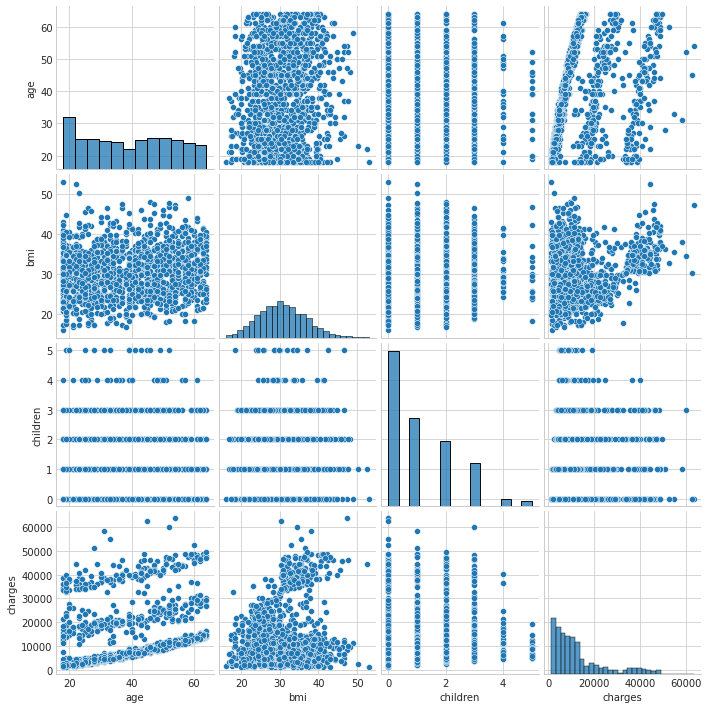

In [4]:
sns.pairplot(df)

<AxesSubplot:>

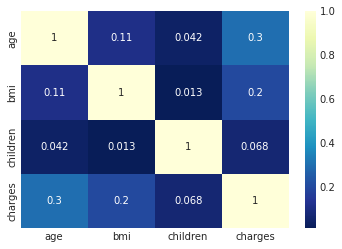

In [5]:
sns.heatmap(df.corr(),cmap='YlGnBu_r',annot=True)

- to get cmap hex-color

In [6]:
import matplotlib
from matplotlib import cm

cmap = cm.get_cmap('Pastel1',5)
[matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

#matplotlib.colors.rgb2hex(cmap(0))

['#fbb4ae', '#ccebc5', '#fed9a6', '#e5d8bd', '#f2f2f2']

<AxesSubplot:xlabel='bmi', ylabel='charges'>

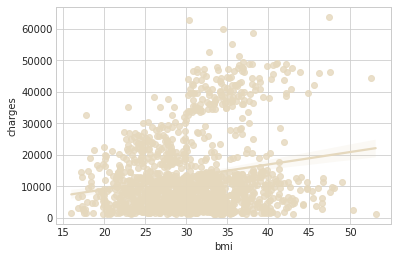

In [7]:
sns.regplot(x="bmi", y="charges", color='#e5d8bd', data=df)

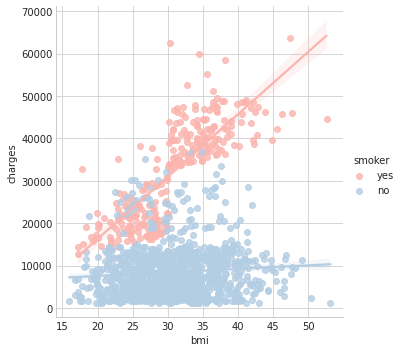

In [8]:
sns.lmplot(x="bmi", y="charges", hue="smoker",data=df,palette='Pastel1')
#sns.lmplot(x="bmi", y="charges", hue="smoker", col='smoker',data=df,palette='Pastel1')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'log scale of charges distribution')

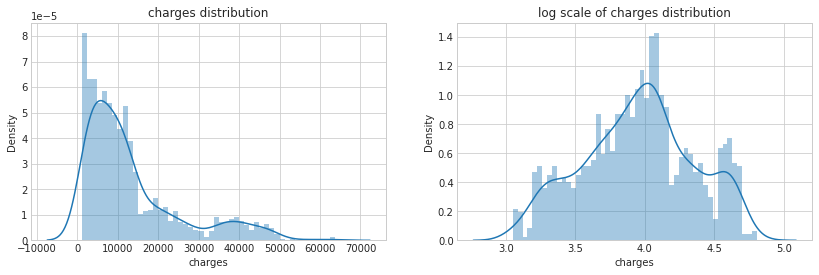

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['charges'],bins=50)
plt.title('charges distribution')
plt.subplot(122)
sns.distplot(np.log10(df['charges']),bins=50)
plt.title('log scale of charges distribution')

- in log scale, it's more like Gaussian

If a logarithmic transformation is applied, the differences between smaller values will be expanded (because the slope of the logarithmic function is steeper when values are small) whereas the differences between larger values will be reduced (because of the very moderate slope of the log distribution for larger values)

https://blog.minitab.com/en/applying-statistics-in-quality-projects/how-could-you-benefit-from-a-box-cox-transformation

<AxesSubplot:xlabel='smoker', ylabel='charges'>

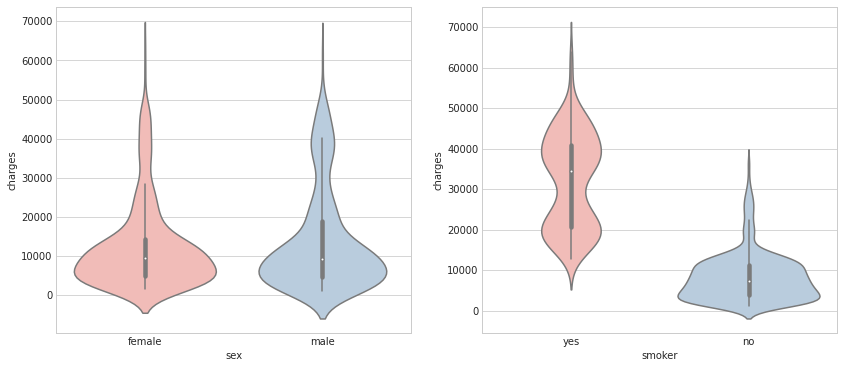

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.violinplot(x='sex',y='charges',data=df, palette='Pastel1')
plt.subplot(122)
sns.violinplot(x='smoker',y='charges',data=df, palette='Pastel1')

- the charge range for smoker is much wider

<AxesSubplot:xlabel='children', ylabel='charges'>

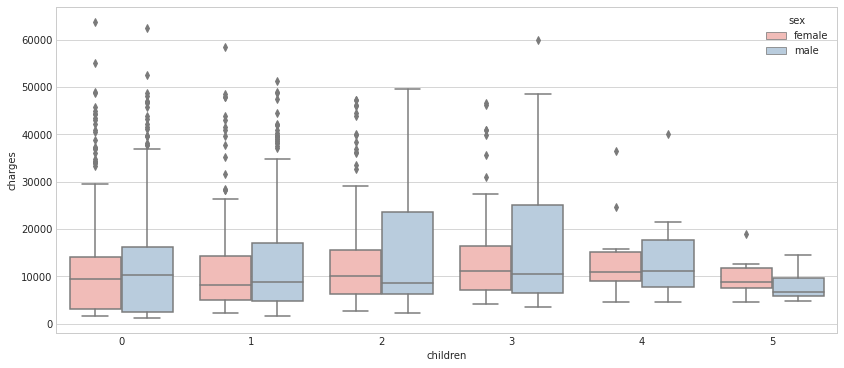

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children',y='charges',hue='sex',data=df,palette='Pastel1')

In [12]:
df.groupby('children').agg(['mean','min','max'])['charges']

mean        min          max
children                                      
0         12365.975602  1121.8739  63770.42801
1         12731.171832  1711.0268  58571.07448
2         15073.563734  2304.0022  49577.66240
3         15355.318367  3443.0640  60021.39897
4         13850.656311  4504.6624  40182.24600
5          8786.035247  4687.7970  19023.26000

- 3 children is averagely higher

<AxesSubplot:xlabel='region', ylabel='charges'>

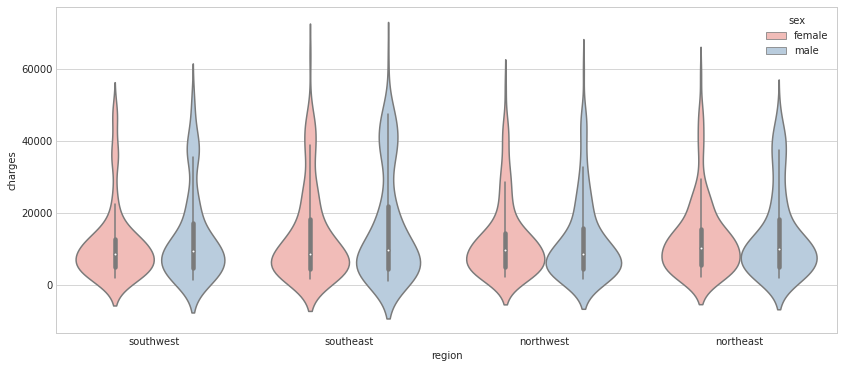

In [13]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region',y='charges',hue='sex',data=df,palette='Pastel1')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

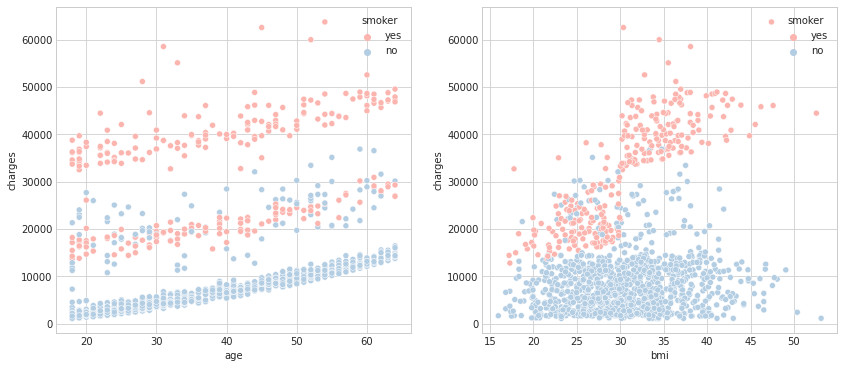

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.scatterplot(x='age',y='charges',hue='smoker',data=df,palette='Pastel1')
plt.subplot(122)
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df,palette='Pastel1')

## data processing

- categorical data must be transfered into number

label encoding / one hot / dummy variable trap

In [15]:
cat_cols=['sex','children','smoker','region']

df_oh=pd.get_dummies(data=df, prefix='oh',columns=cat_cols,drop_first=True,dtype='int8')

df_oh

age     bmi      charges  oh_male  oh_1  oh_2  oh_3  oh_4  oh_5  oh_yes  \
0      19  27.900  16884.92400        0     0     0     0     0     0       1   
1      18  33.770   1725.55230        1     1     0     0     0     0       0   
2      28  33.000   4449.46200        1     0     0     1     0     0       0   
3      33  22.705  21984.47061        1     0     0     0     0     0       0   
4      32  28.880   3866.85520        1     0     0     0     0     0       0   
...   ...     ...          ...      ...   ...   ...   ...   ...   ...     ...   
1333   50  30.970  10600.54830        1     0     0     1     0     0       0   
1334   18  31.920   2205.98080        0     0     0     0     0     0       0   
1335   18  36.850   1629.83350        0     0     0     0     0     0       0   
1336   21  25.800   2007.94500        0     0     0     0     0     0       0   
1337   61  29.070  29141.36030        0     0     0     0     0     0       1   

      oh_northwest  oh_southeast  oh_southwest  
0                0             0             1  
1                0             1             0  
2                0             1             0  
3                1             0             0  
4                1             0             0  
...            ...           ...           ...  
1333             1             0             0  
1334             0             0             0  
1335             0             1             0  
1336             0             0             1  
1337             1             0             0  

[1338 rows x 13 columns]

- box-cox: transfer non-Gaussian to Gaussian

cuz Gaussian is an important assumption for many statistical tech

if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests

All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.

In [16]:
from scipy.stats import boxcox

y_bc,lam,ci=boxcox(df_oh['charges'],alpha=0.05)

y_bc.shape, lam,ci

((1338,), 0.043649053770664956, (-0.01140290617294196, 0.0988096859767545))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'log10 of charges')

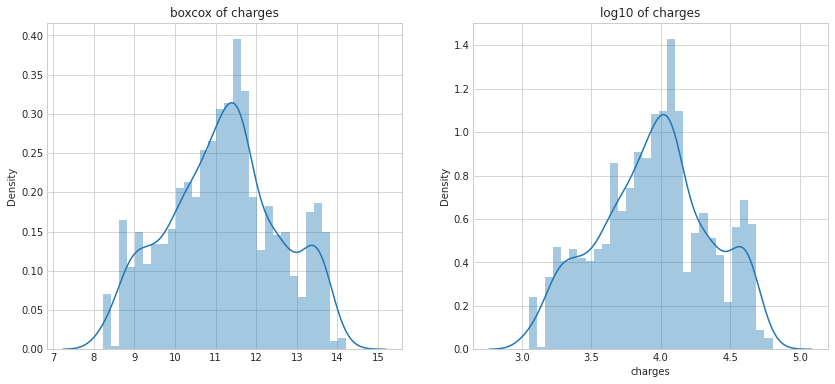

In [17]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(y_bc,bins=30)
plt.title('boxcox of charges')
plt.subplot(122)
sns.distplot(np.log10(df_oh['charges']),bins=30)
plt.title('log10 of charges')

In [18]:
df_oh['charges']=np.log(df_oh['charges'])

In [19]:
from sklearn.model_selection import train_test_split

X=df_oh.drop('charges',axis=1)
y=df_oh['charges']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

## model building

- analytical building

$\theta=(\textbf{X}^T\textbf{X})^{-1}_{(n+1)\times (n+1)}\textbf{X}^T_{(n+1)\times m}\textbf{y}_{m \times 1}$

In [20]:
x_train.shape,y_train.shape

#n=16, m=936

((936, 12), (936,))

In [21]:
#add x0=1 axis
x_train=np.c_[np.ones((x_train.shape[0],1)),x_train]
x_test=np.c_[np.ones((x_test.shape[0],1)),x_test]

theta=(np.linalg.inv(x_train.T @ x_train)) @ x_train.T @ y_train
#theta=np.matmul(np.linalg.inv(np.matmul(x_train.T,x_train)),np.matmul(x_train.T,y_train))
#theta=(np.linalg.inv(x_train.T @ x_train)) @ (x_train.T @ y_train)

In [22]:
df_oh.columns.values

array(['age', 'bmi', 'charges', 'oh_male', 'oh_1', 'oh_2', 'oh_3', 'oh_4',
       'oh_5', 'oh_yes', 'oh_northwest', 'oh_southeast', 'oh_southwest'],
      dtype=object)

In [23]:
coef=['theta_'+str(i) for i in range(x_train.shape[1])]
cols=['intersect:x_0=1']+list(X.columns)

coef_df=pd.DataFrame({'coef:':coef,'cols:':cols,'theta:':theta})

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
coef_df['skl_theta']=pd.Series([lr.intercept_]+list(lr.coef_))

coef_df


coef:            cols:    theta:  skl_theta
0    theta_0  intersect:x_0=1  7.059171   7.059171
1    theta_1              age  0.033134   0.000000
2    theta_2              bmi  0.013517   0.033134
3    theta_3          oh_male -0.067767   0.013517
4    theta_4             oh_1  0.149457  -0.067767
5    theta_5             oh_2  0.272919   0.149457
6    theta_6             oh_3  0.244095   0.272919
7    theta_7             oh_4  0.523339   0.244095
8    theta_8             oh_5  0.466030   0.523339
9    theta_9           oh_yes  1.550481   0.466030
10  theta_10     oh_northwest -0.055845   1.550481
11  theta_11     oh_southeast -0.146578  -0.055845
12  theta_12     oh_southwest -0.133508  -0.146578

## model evaluation

MSE for test data

$J(\theta)=(1/m) \sum_{i=1}^m (\hat{y}_i-y_i)^2$

$R^2$ - a statistical measure of how close data are to the fitted regression line

$R^2=1-\frac{\sum_{i=1}^m (\hat{y}_i-y_i)^2}{\sum_{i=1}^m (y_i-\bar{y}_i)^2}$

$\sum_{i=1}^m (\hat{y}_i-y_i)^2$ - sum of square err

$\sum_{i=1}^m (y_i-\bar{y}_i)^2$ - sum of square total


In [24]:
y_pred=x_test @ theta

mse=np.sum((y_pred-y_test)**2)/x_test.shape[0]

sse=np.sum((y_pred-y_test)**2)
sst=np.sum((y_test-y_test.mean())**2)

r2=1-sse/sst

print('analytical mse:',mse,'r2:',r2)

y_pred_skl=lr.predict(x_test)
from sklearn.metrics import mean_squared_error

mse_skl=mean_squared_error(y_pred_skl,y_test)
r2_skl=lr.score(x_test,y_test)

print('sklearn mse:',mse_skl,'r2:',r2_skl)

analytical mse: 0.18729622322982062 r2: 0.7795687545055299
sklearn mse: 0.18729622322981876 r2: 0.7795687545055321


- **Actual value vs Predicted value**: check linear relationship between variables and target

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Linearity between y_test and y_pred_skl')

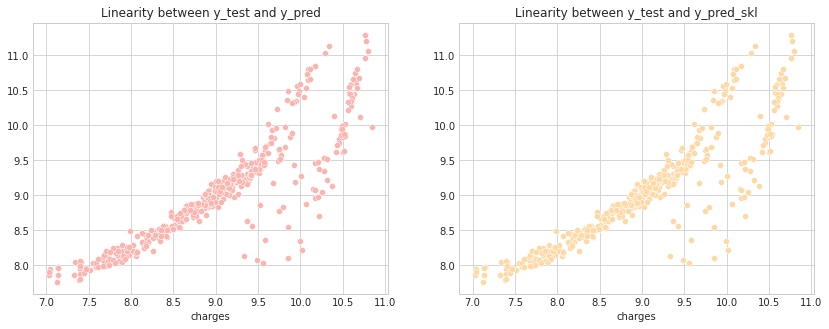

In [25]:
#['#fbb4ae', '#ccebc5', '#fed9a6', '#e5d8bd', '#f2f2f2']
#check linearity
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.scatterplot(y_test,y_pred,color='#fbb4ae')
plt.title('Linearity between y_test and y_pred')
plt.subplot(122)
sns.scatterplot(y_test,y_pred_skl,color='#fed9a6')
plt.title('Linearity between y_test and y_pred_skl')

- **residual err should be normally distributed**

- **mean of residual err should be 0 or close to 0**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'residual distribution between y_test and y_pred_skl')

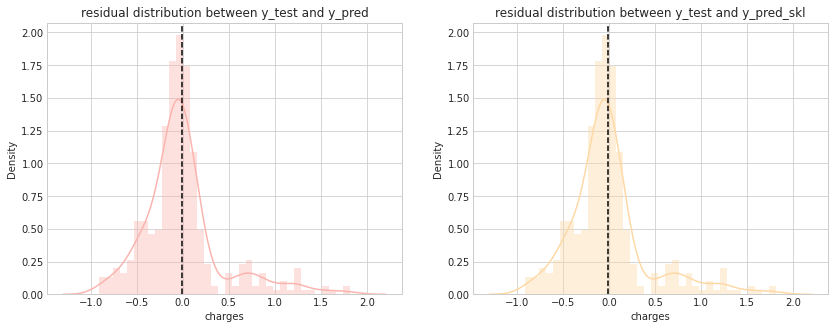

In [26]:
#check residual normality 
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(y_test-y_pred,color='#fbb4ae')
plt.axvline((y_test-y_pred).mean(),color='black',linestyle='--')
plt.title('residual distribution between y_test and y_pred')
plt.subplot(122)
sns.distplot(y_test-y_pred_skl,color='#fed9a6')
plt.axvline((y_test-y_pred_skl).mean(),color='black',linestyle='--')
plt.title('residual distribution between y_test and y_pred_skl')

- **Q-Q plot (Quantile-Quantile plot)**

assumption: linear regression require all variables to be multivariate Gaussian

compare the quantile of residual with the quantile of Gaussian residual

Text(0.5, 1.0, 'multivariate Normality between y_test and y_pred_skl, \nQ-Q plot')

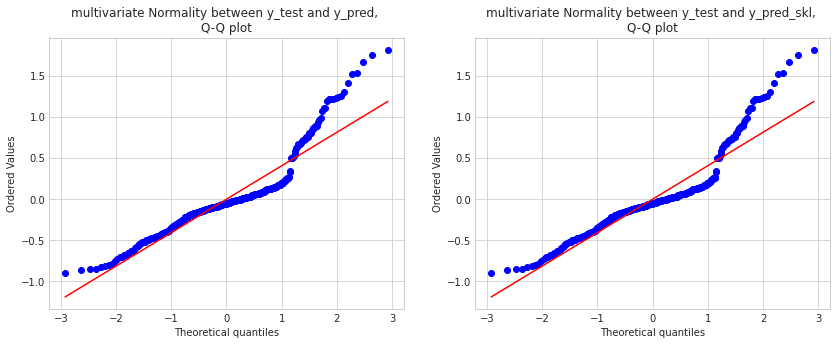

In [27]:
#check for multivairate gaussian
from scipy.stats import probplot

f,ax=plt.subplots(1,2,figsize=(14,5))

#default Gaussian
probplot((y_test-y_pred),fit=True, plot=ax[0])
ax[0].set_title('multivariate Normality between y_test and y_pred, \nQ-Q plot')

probplot((y_test-y_pred_skl),fit=True, plot=ax[1])
ax[1].set_title('multivariate Normality between y_test and y_pred_skl, \nQ-Q plot')


- check **Multicollinearity**

Multicollinearity occurs when the independent variables are too highly correlated with each other

The **variance inflation factor** (VIF) identifies correlation between independent variables and strength of that correlation

$VIF=1/(1-R^2)$

here $R^2$ is simply R-squared (coefficient determinition)

if VIF >1 & VIF <5 moderate correlation

VIF < 5 critical level of multicollinearity

In [28]:
print('vif for analytical and sklearn:',1/(1-r2),1/(1-r2_skl))

vif for analytical and sklearn: 4.536561945911096 4.536561945911142


- check **homoscedasticity**

**residuals should have relative constant variance**

the data are homoscedastic meaning the residuals are equal across the regression line

we can look at **residual Vs fitted value** scatter plot, if heteroscedastic plot would exhibit a funnel shape pattern

Text(0.5, 1.0, 'homoscedasticity between y_test and y_pred_skl')

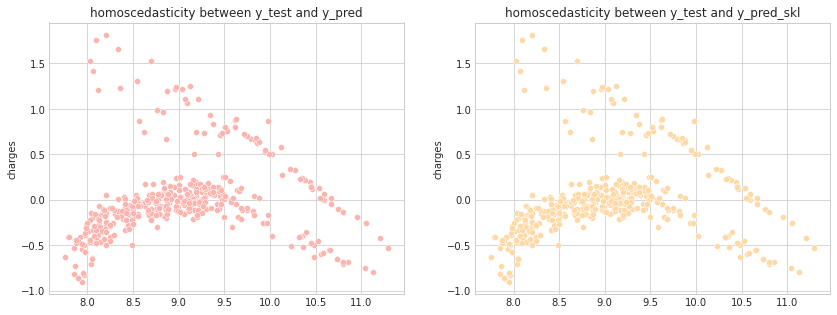

In [29]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.scatterplot(x=y_pred, y=y_test-y_pred,color='#fbb4ae')
plt.title('homoscedasticity between y_test and y_pred')
plt.subplot(122)
sns.scatterplot(x=y_pred_skl,y=y_test-y_pred_skl,color='#fed9a6')
plt.title('homoscedasticity between y_test and y_pred_skl')

Text(0.5, 1.0, 'homoscedasticity between y_test and y_pred_skl')

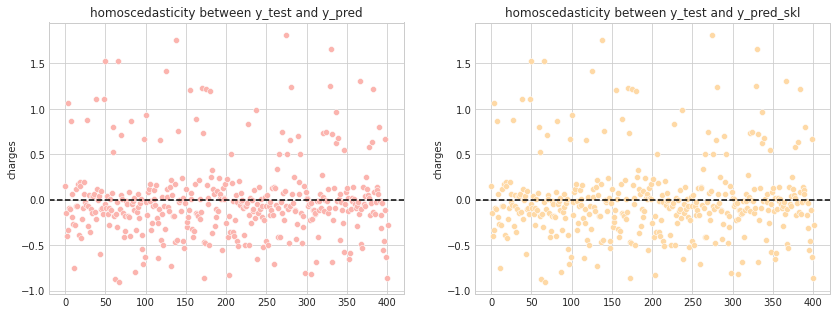

In [30]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.scatterplot(x=np.arange(y_pred.shape[0]), y=y_test-y_pred,color='#fbb4ae')
plt.axhline(0,color='black',linestyle='--')
plt.title('homoscedasticity between y_test and y_pred')
plt.subplot(122)
sns.scatterplot(x=np.arange(y_pred_skl.shape[0]),y=y_test-y_pred_skl,color='#fed9a6')
plt.axhline(0,color='black',linestyle='--')
plt.title('homoscedasticity between y_test and y_pred_skl')


in summary:

check

- actual value vs predicted value: check linear relationship between variables and target

fail, since it'a curve

- residual err should be normally distributed

- mean of residual err should be 0 or close to 0

mean is 0, but right-skewed

- Q-Q plot (Quantile-Quantile plot)

log value greater than 1.5 trends to increase

- multicollinearity

vif<5, so no multicollinearity

- homoscedasticity

err will increase after certain point

# Approach 2 - quadLR, rf

https://www.kaggle.com/hely333/eda-regression

## EDA

In [31]:
from sklearn.preprocessing import LabelEncoder

df_2=df.copy()

le=LabelEncoder()

le.fit(df_2.sex)
df_2['sex']=le.transform(df_2.sex) #male 1, female 0

le.fit(df_2.smoker)
df_2['smoker']=le.transform(df_2.smoker) #yes 1, no 2

le.fit(df_2.region)
df_2['region']=le.transform(df_2.region) #sw 3, se 2, nw1

df_2

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

In [32]:
type(df_2.sex[0])

numpy.int64

In [33]:
df_2.corr()

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000

In [34]:
df_2.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

- encode categorical data to int

<AxesSubplot:>

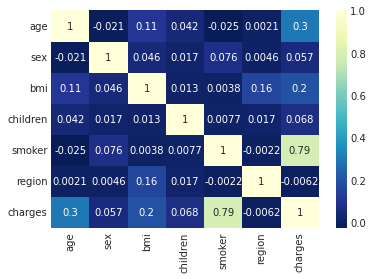

In [35]:
sns.heatmap(df_2.corr(),cmap='YlGnBu_r',annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

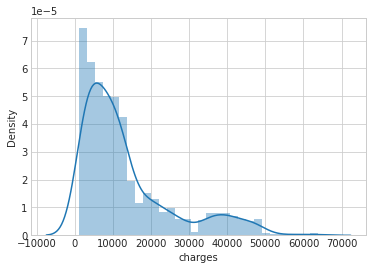

In [36]:
sns.distplot(df_2['charges'])

- check smoker or non-smoker

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'p(non-smoker)')

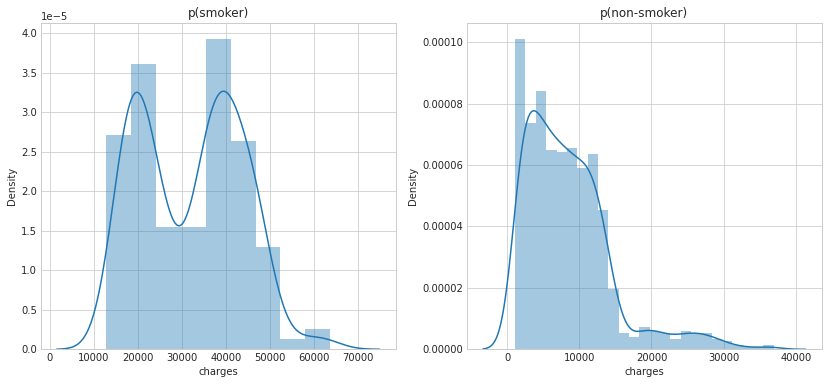

In [37]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(df_2[df_2.smoker==1]['charges'])
plt.title('p(smoker)')
plt.subplot(122)
sns.distplot(df_2[df_2.smoker==0]['charges'])
plt.title('p(non-smoker)')

- check gender

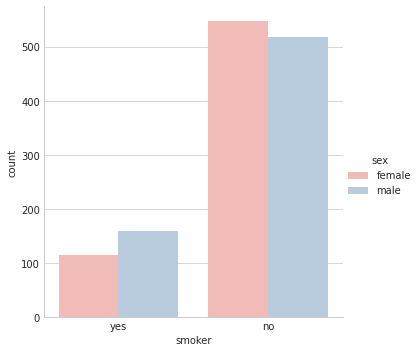

In [38]:
#catplot - Figure-level interface for drawing categorical plots onto a FacetGrid.

sns.catplot(x='smoker',kind='count',hue='sex',palette='Pastel1',data=df)
#sns.catplot(x='smoker',kind='count',hue='sex',palette='Pastel1',data=df_2)

it can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking

since more men smokes than women

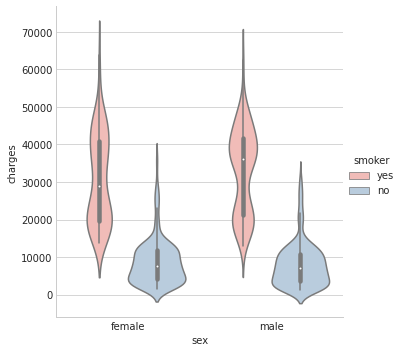

In [39]:
sns.catplot(x='sex',y='charges',hue='smoker',kind='violin',data=df,palette='Pastel1')

Text(0.5, 1.0, 'charge of men')

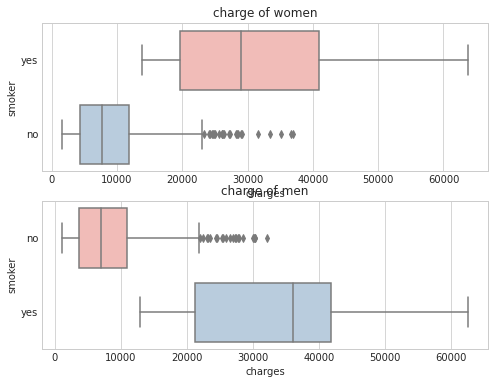

In [40]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(y='smoker',x='charges',data=df[df.sex=='female'],orient='h',palette='Pastel1')
plt.title('charge of women')
plt.subplot(212)
sns.boxplot(y='smoker',x='charges',data=df[df.sex=='male'],orient='h',palette='Pastel1')
plt.title('charge of men')

- check age

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

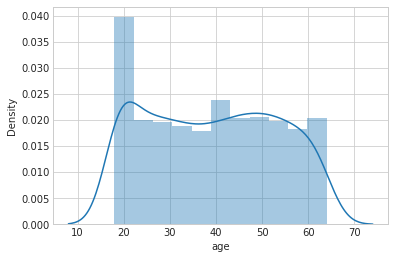

In [41]:
sns.distplot(df['age'])

- min age=18, max age=64

Text(0.5, 1.0, 'smoking #ppl age 18')

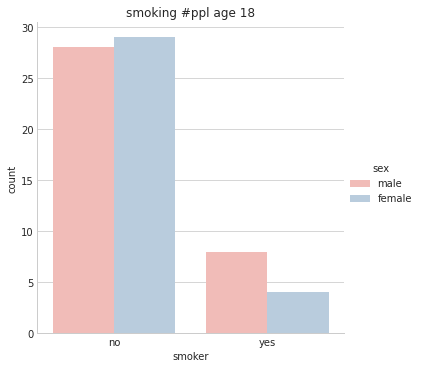

In [42]:
sns.catplot(x='smoker',kind='count',hue='sex',palette='Pastel1',data=df[df.age==18])
plt.title('smoking #ppl age 18')

Text(0.5, 1.0, 'smoking #ppl age 30~40')

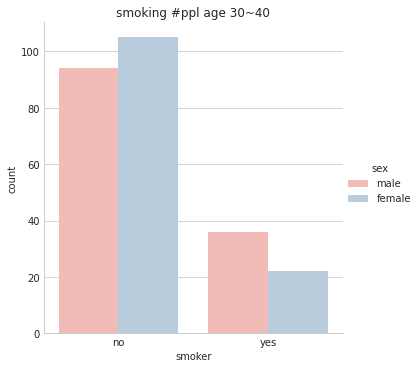

In [43]:
sns.catplot(x='smoker',kind='count',hue='sex',palette='Pastel1',data=df[(df.age>=30) & (df.age<40)])
plt.title('smoking #ppl age 30~40')

Text(0.5, 1.0, 'charge of age 30~40')

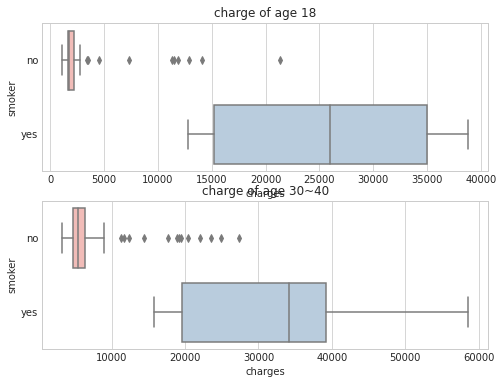

In [44]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(y='smoker',x='charges',data=df[df.age==18],orient='h',palette='Pastel1')
plt.title('charge of age 18')
plt.subplot(212)
sns.boxplot(y='smoker',x='charges',data=df[(df.age>=30) & (df.age<40)],orient='h',palette='Pastel1')
plt.title('charge of age 30~40')

- tail of nonsmoker at age 18 can be due to diseases or accidents

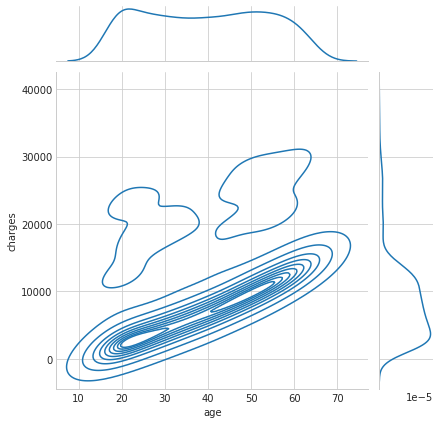

In [45]:
sns.jointplot(x='age',y='charges',data=df[df.smoker=='no'],kind='kde')

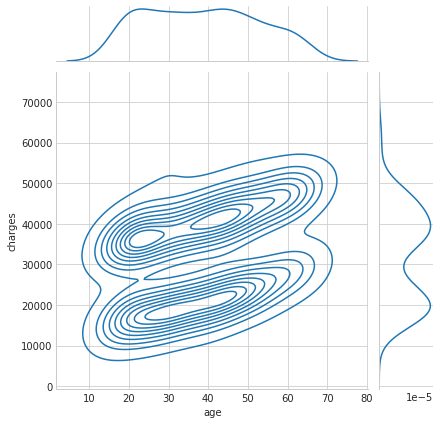

In [46]:
sns.jointplot(x='age',y='charges',data=df[df.smoker=='yes'],kind='kde')

<AxesSubplot:xlabel='age', ylabel='charges'>

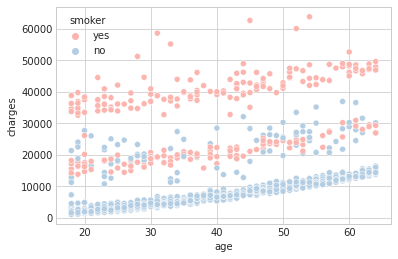

In [47]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=df,palette='Pastel1')

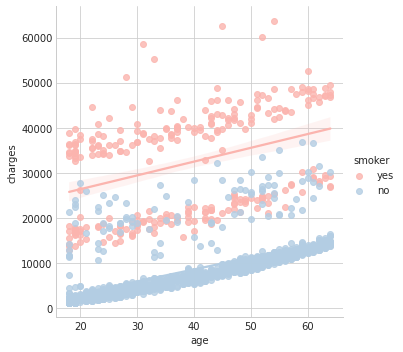

In [48]:
sns.lmplot(x='age',y='charges',hue='smoker',data=df,palette='Pastel1')

- check bmi

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

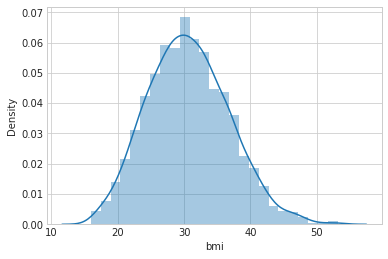

In [49]:
sns.distplot(df['bmi'])

- a bmi value =30 starts obesity

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


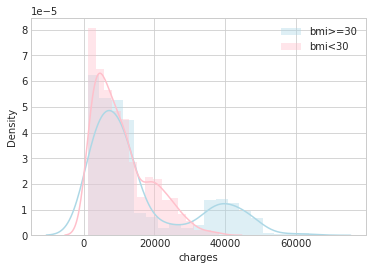

In [50]:
#plt.figure(figsize=(14,6))
#plt.subplot(121)
sns.distplot(df[df.bmi>=30]['charges'],color='lightblue',label='bmi>=30')
#plt.title('bmi >= 30')
#plt.subplot(122)
sns.distplot(df[df.bmi<30]['charges'],color='pink',label='bmi<30')
plt.legend()
#plt.title('bmi < 30')

- bmi>=30 spend more

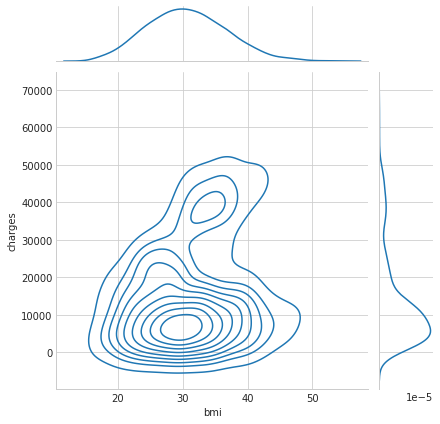

In [51]:
#joint distribution
sns.jointplot(x='bmi',y='charges',data=df,kind='kde')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

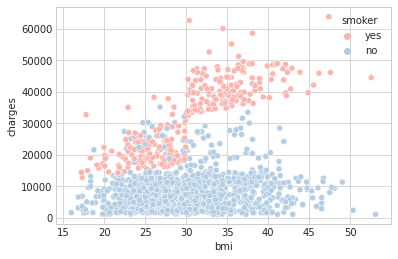

In [52]:
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df,palette='Pastel1')

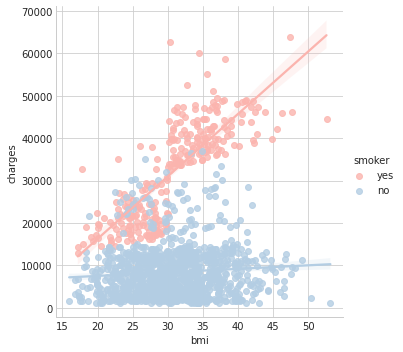

In [53]:
sns.lmplot(x='bmi',y='charges',hue='smoker',data=df,palette='Pastel1')

- check children

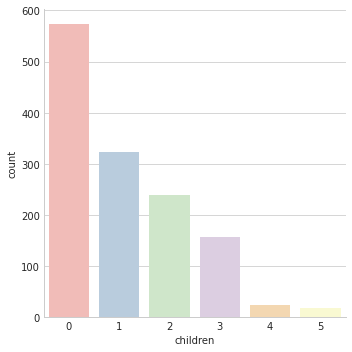

In [54]:
sns.catplot(x='children',kind='count',palette='Pastel1',data=df)

Text(0.5, 1.0, 'smoker or non who have children')

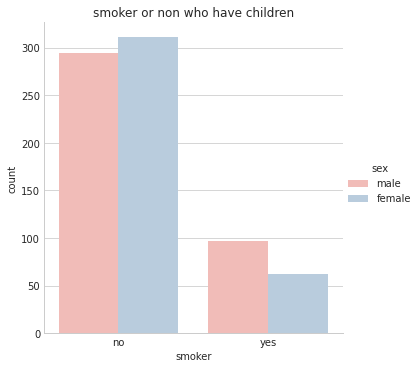

In [55]:
sns.catplot(x='smoker',kind='count',palette='Pastel1',hue='sex',data=df[df.children>0])
plt.title('smoker or non who have children')

Text(0.5, 1.0, 'smoker or non who dont have children')

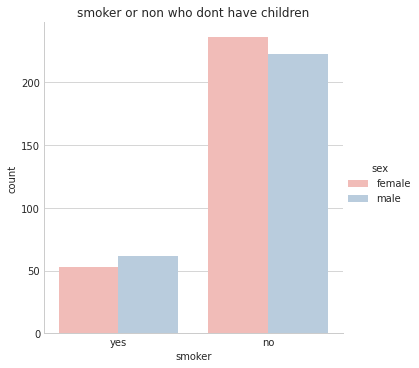

In [56]:
sns.catplot(x='smoker',kind='count',palette='Pastel1',hue='sex',data=df[df.children==0])
plt.title('smoker or non who dont have children')

## model building

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X=df_2.drop(['charges'],axis=1)
y=df_2.charges

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
lr=LinearRegression().fit(x_train,y_train)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

print('lazy lr score:',lr.score(x_test,y_test))
print('lazy lr r2 training, test:',r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred))

lazy lr score: 0.7338069544102044
lazy lr r2 training, test: 0.7551158429564245 0.7338069544102044


- not bad for no pre-processing, and such a lazy implementation

In [58]:
tep=df_2['age'].values
quad=PolynomialFeatures(degree=2)
tep_quad=quad.fit_transform(tep.reshape(-1,1))

tep.shape,tep_quad.shape

((1338,), (1338, 3))

In [59]:
X=df_2.drop(['charges','region'],axis=1)
y=df_2.charges

quad=PolynomialFeatures(degree=2)

X_quad=quad.fit_transform(X)

#print(X_quad.shape, X.shape)

x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(X_quad,y,random_state=1)

quad_lr=LinearRegression().fit(x_train_2,y_train_2)

y_train_pred_2=quad_lr.predict(x_train_2)
y_test_pred_2=quad_lr.predict(x_test_2)

print('quadratic lr r2-score:',quad_lr.score(x_test_2,y_test_2))

quadratic lr r2-score: 0.8377721326909117


In [60]:
rf=RandomForestRegressor(n_estimators = 100,criterion = 'mse',random_state = 1,n_jobs = -1)

rf.fit(x_train,y_train)
rf_train_pred=rf.predict(x_train)
rf_test_pred=rf.predict(x_test)

print('mse of training: %.3f, mse of test: %.3f' % (mean_squared_error(y_train,rf_train_pred),mean_squared_error(y_test,rf_test_pred)))
print('r2 of training:  %.3f, r2 of test: %.3f' % (r2_score(y_train,rf_train_pred),r2_score(y_test,rf_test_pred)))

mse of training: 3432600.322, mse of test: 22497275.000
r2 of training:  0.977, r2 of test: 0.833


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

Text(0.5, 1.0, 'quadratic linear noise')

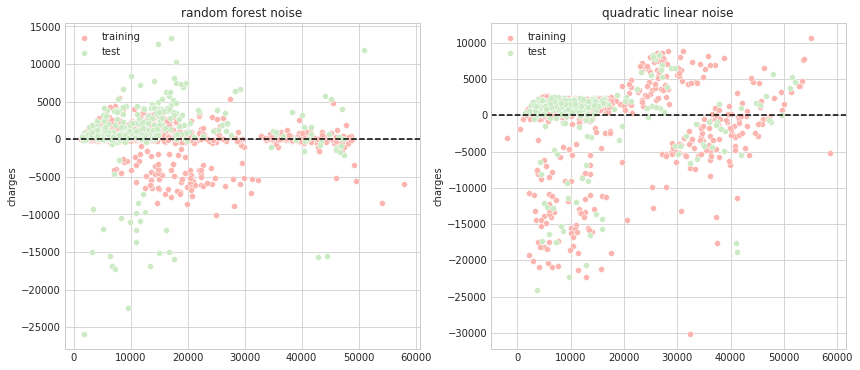

In [61]:
plt.figure(figsize=(14,6))
#['#fbb4ae', '#ccebc5', '#fed9a6', '#e5d8bd', '#f2f2f2']
plt.subplot(121)
sns.scatterplot(rf_train_pred,rf_train_pred-y_train,color='#fbb4ae',label='training')
sns.scatterplot(rf_test_pred,rf_test_pred-y_test,color='#ccebc5',label='test')
plt.axhline(y=0,color='black',linestyle='--')
plt.title('random forest noise')
plt.subplot(122)
sns.scatterplot(y_train_pred_2,y_train_pred_2-y_train_2,color='#fbb4ae',label='training')
sns.scatterplot(y_test_pred_2,y_test_pred_2-y_test_2,color='#ccebc5',label='test')
plt.axhline(y=0,color='black',linestyle='--')
plt.title('quadratic linear noise')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'normal linear noise')

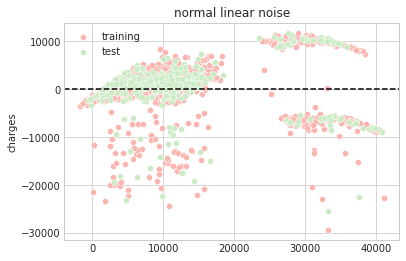

In [62]:
sns.scatterplot(y_train_pred,y_train_pred-y_train,color='#fbb4ae',label='training')
sns.scatterplot(y_test_pred,y_test_pred-y_test,color='#ccebc5',label='test')
plt.axhline(y=0,color='black',linestyle='--')
plt.title('normal linear noise')

# Approach 3 - EDA, clustering

https://www.kaggle.com/janiobachmann/patient-charges-clustering-and-regression

## some EDA

In [63]:
pas=sns.color_palette('Pastel1')[:10]

## age -> category

- young adult: 18-35
- senior adult: 36-55
- elder: >56

In [64]:
df_list=[df]

#print cols
print([c for c in df])

#print col values
print([c for c in df_list])

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
[      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]]


In [65]:
df_3=df.copy()

def age_func(age):
    if age>=18 and age<=35:
        return 'young'
    elif age>35 and age<55:
        return 'senior'
    else:
        return 'elder'
    

df_3['age_cat']=df_3['age'].map(age_func)

df_3.head()

age     sex     bmi  children smoker     region      charges age_cat
0   19  female  27.900         0    yes  southwest  16884.92400   young
1   18    male  33.770         1     no  southeast   1725.55230   young
2   28    male  33.000         3     no  southeast   4449.46200   young
3   33    male  22.705         0     no  northwest  21984.47061   young
4   32    male  28.880         0     no  northwest   3866.85520   young

In [66]:
df_3.groupby(['age_cat']).size()

age_cat
elder     242
senior    522
young     574
dtype: int64

<AxesSubplot:ylabel='None'>

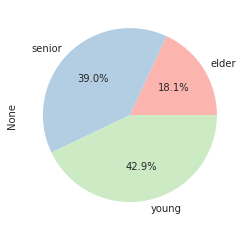

In [67]:
df_3.groupby(['age_cat']).size().plot(kind='pie',colors = pas, autopct='%.1f%%')

<AxesSubplot:xlabel='age_cat', ylabel='bmi'>

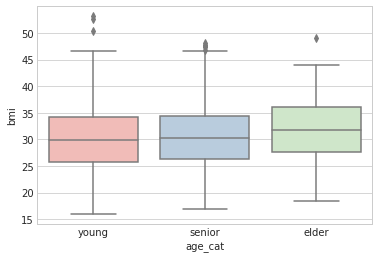

In [68]:
sns.boxplot(y='bmi',x='age_cat',data=df_3, palette='Pastel1')
#sns.boxplot(y='smoker',x='charges',data=df[df.sex=='male'],orient='h',palette='Pastel1')

# p-value later check!

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

ols('bmi~age_cat',data=df_3).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.412
Date:                Sun, 23 Jan 2022   Prob (F-statistic):            0.00169
Time:                        22:03:47   Log-Likelihood:                -4310.7
No. Observations:                1338   AIC:                             8627.
Df Residuals:                    1335   BIC:                             8643.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            31.7620      0.390     81.351      0.000      30.996      32.528
age_cat[T.senior]    -0.9992      0.472     -2.115      0.035      -1.926      -0.073
age_cat[T.young]     -1.6521      0.466     -3.549      0.000      -2.565      -0.739
==============================================================================
Omnibus:                       20.234   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.918
Skew:                           0.306   Prob(JB):                     2.87e-05
Kurtosis:                       2.989   Cond. No.                         4.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value: The p-value being higher than 0.05 tells us that we take the Null hypothesis, meaning that there is no a significant change between the three age categories when it comes to Body Mass Index

<AxesSubplot:xlabel='age_cat', ylabel='bmi'>

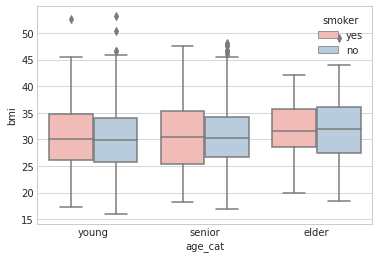

In [70]:
sns.boxplot(x='age_cat',y='bmi',hue='smoker',data=df_3,palette='Pastel1')

<AxesSubplot:xlabel='age_cat'>

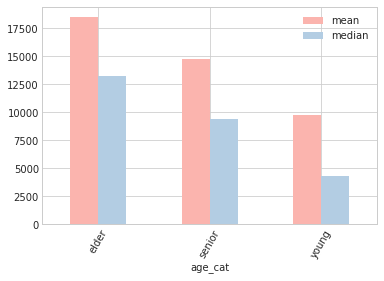

In [71]:
df_3.groupby('age_cat')['charges'].agg(['mean','median']).plot(kind='bar',color=pas[:2],rot=60)
#df_3.groupby('age_cat')['charges'].agg(['median']).plot(kind='bar',color=pas[1],rot=60)

## bmi -> cat

In [72]:
def bmi_func(bmi):
    if bmi<18.5:
        return 'under'
    elif bmi>=18.5 and bmi<=24.9:
        return 'normal'
    elif bmi>=25 and bmi<29.9:
        return 'over'
    else:
        return 'obese'
    

df_3['bmi_weight']=df_3['bmi'].map(bmi_func)

df_3.head()

age     sex     bmi  children smoker     region      charges age_cat  \
0   19  female  27.900         0    yes  southwest  16884.92400   young   
1   18    male  33.770         1     no  southeast   1725.55230   young   
2   28    male  33.000         3     no  southeast   4449.46200   young   
3   33    male  22.705         0     no  northwest  21984.47061   young   
4   32    male  28.880         0     no  northwest   3866.85520   young   

  bmi_weight  
0       over  
1      obese  
2      obese  
3     normal  
4       over

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


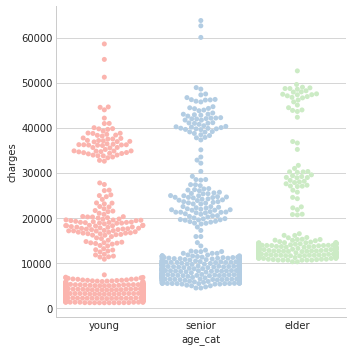

In [73]:
sns.catplot(data=df_3, kind="swarm", x="age_cat", y="charges", palette='Pastel1')
#sns.catplot(data=df_3, kind="swarm", x="age_cat", y="charges", hue="smoker")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


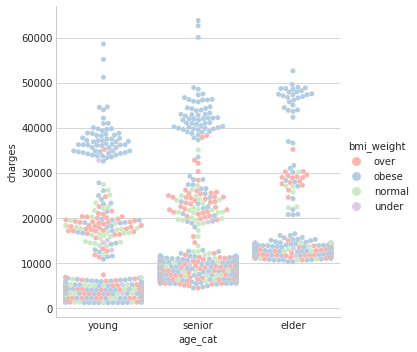

In [74]:
sns.catplot(data=df_3, kind="swarm", x="age_cat", y="charges", hue='bmi_weight', palette='Pastel1')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


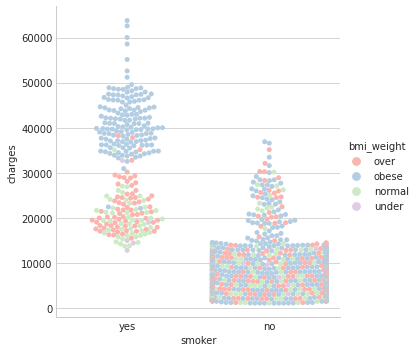

In [75]:
sns.catplot(data=df_3, kind="swarm", x='smoker', y="charges", hue='bmi_weight', palette='Pastel1')

- obese ppl are charged more

- smoker are charged more

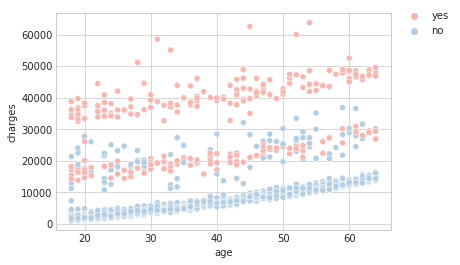

In [76]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=df_3,palette='Pastel1')
plt.legend(bbox_to_anchor=(1.2, 1.05))

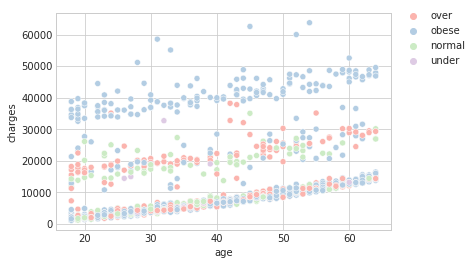

In [77]:
sns.scatterplot(x='age',y='charges',hue='bmi_weight',data=df_3,palette='Pastel1')

plt.legend(bbox_to_anchor=(1.25, 1.05))

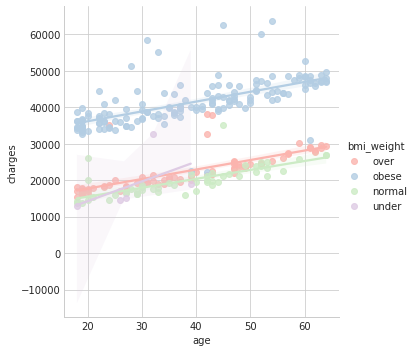

In [78]:
sns.lmplot(x='age',y='charges',hue='bmi_weight',data=df_3[df_3.smoker=='yes'],palette='Pastel1')

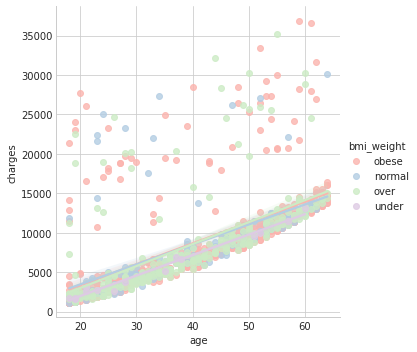

In [79]:
sns.lmplot(x='age',y='charges',hue='bmi_weight',data=df_3[df_3.smoker=='no'],palette='Pastel1')

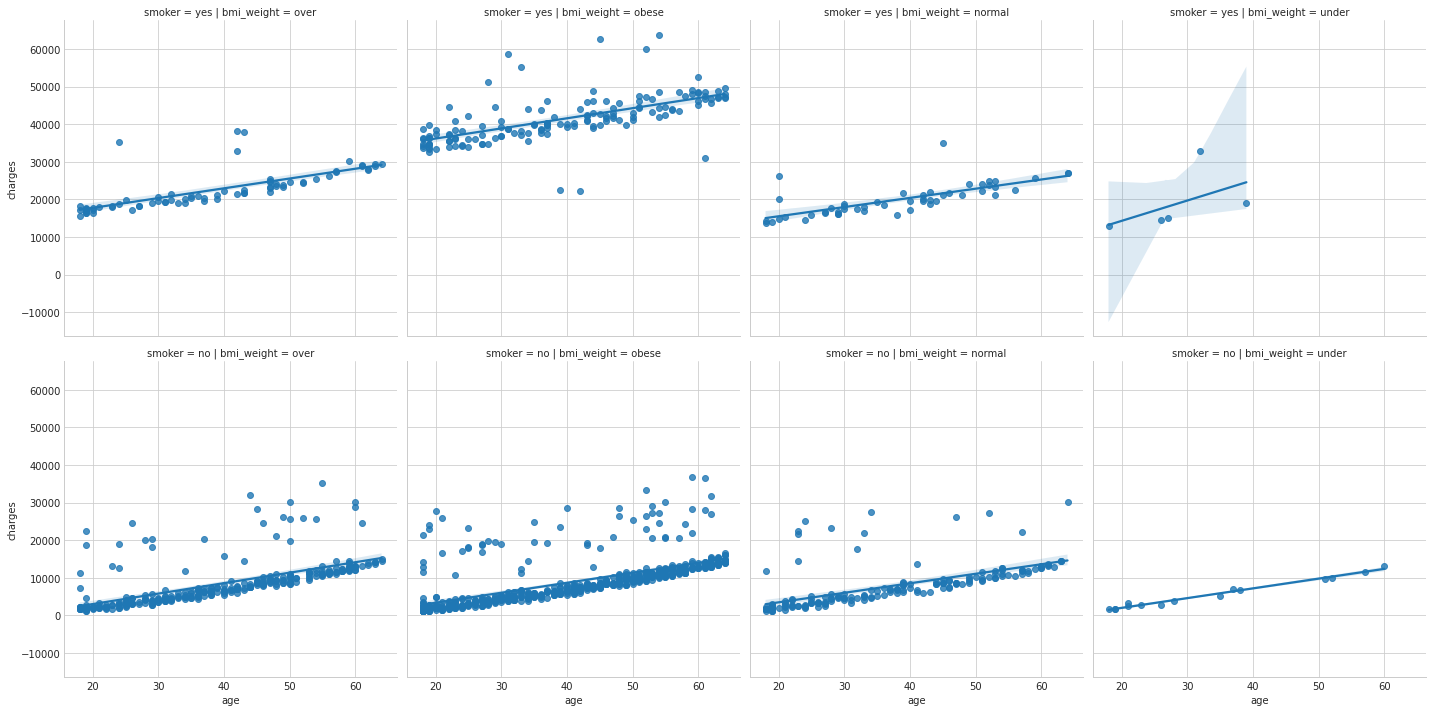

In [80]:
sns.lmplot(x='age',y='charges',col='bmi_weight',row='smoker',data=df_3,palette='pastel')

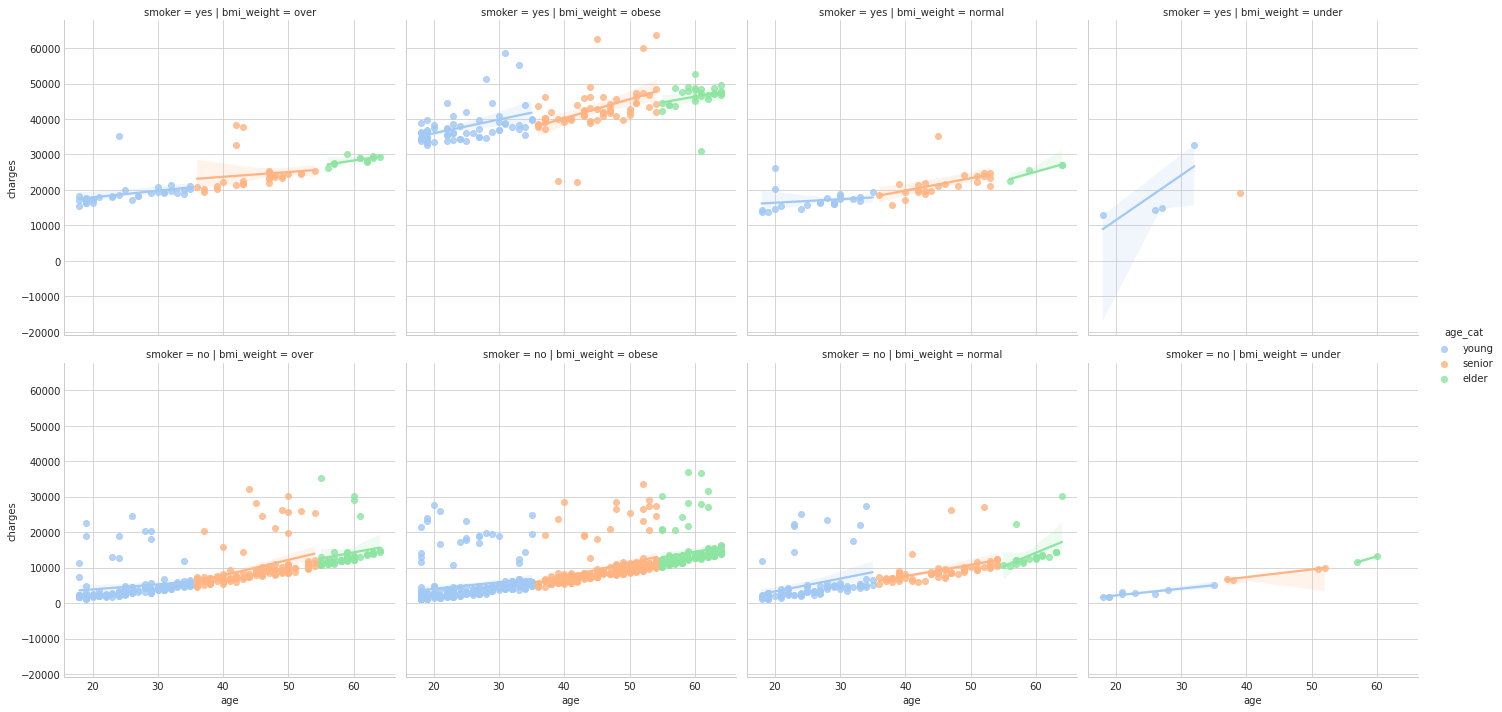

In [81]:
sns.lmplot(x='age',y='charges',col='bmi_weight',row='smoker',hue='age_cat',data=df_3,palette='pastel')

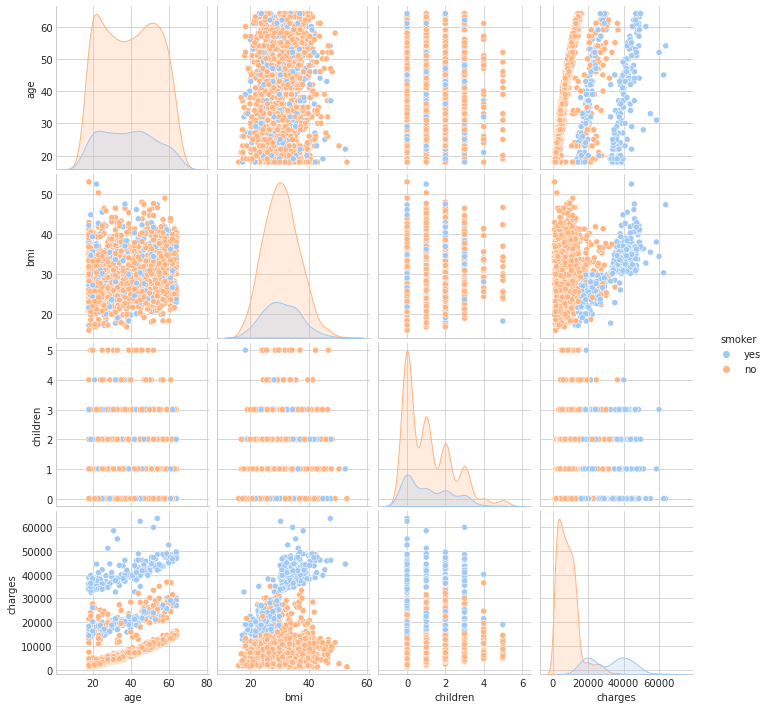

In [82]:
sns.pairplot(df_3,hue='smoker',palette='pastel')

<AxesSubplot:xlabel='bmi_weight', ylabel='charges'>

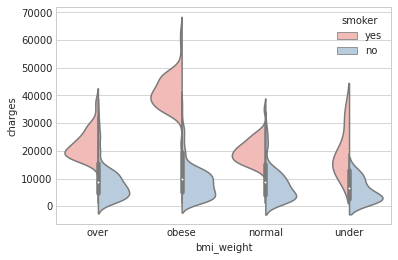

In [83]:
sns.violinplot(x='bmi_weight',y='charges',hue='smoker',data=df_3, palette='Pastel1',split=True)

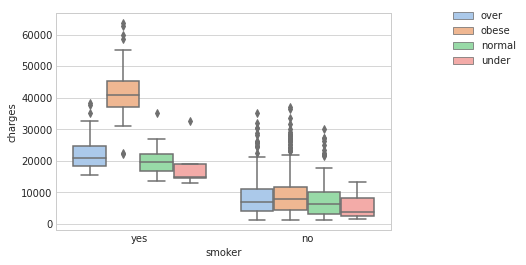

In [84]:
sns.boxplot(x='smoker',y='charges',hue='bmi_weight',data=df_3,palette='pastel')

plt.legend(bbox_to_anchor=(1.4, 1.05))

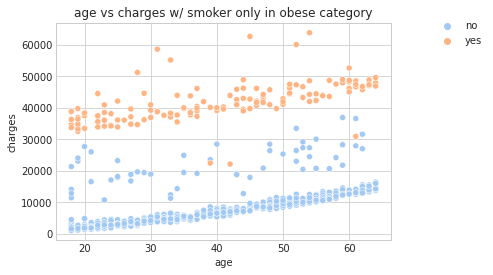

In [85]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=df_3[df_3.bmi_weight=='obese'],palette='pastel')
plt.title('age vs charges w/ smoker only in obese category')
plt.legend(bbox_to_anchor=(1.3, 1.05))

## check region

In [86]:
#df_3.groupby('age_cat')['charges'].agg(['mean','median'])

df_3.groupby(['region','smoker'],)['bmi'].agg(['mean'])

#set_index(['ID', 'Name'], inplace=True)

mean
region    smoker           
northeast no      29.332082
          yes     28.565224
northwest no      29.212678
          yes     29.140431
southeast no      33.442418
          yes     33.096703
southwest no      30.507865
          yes     31.005172

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you

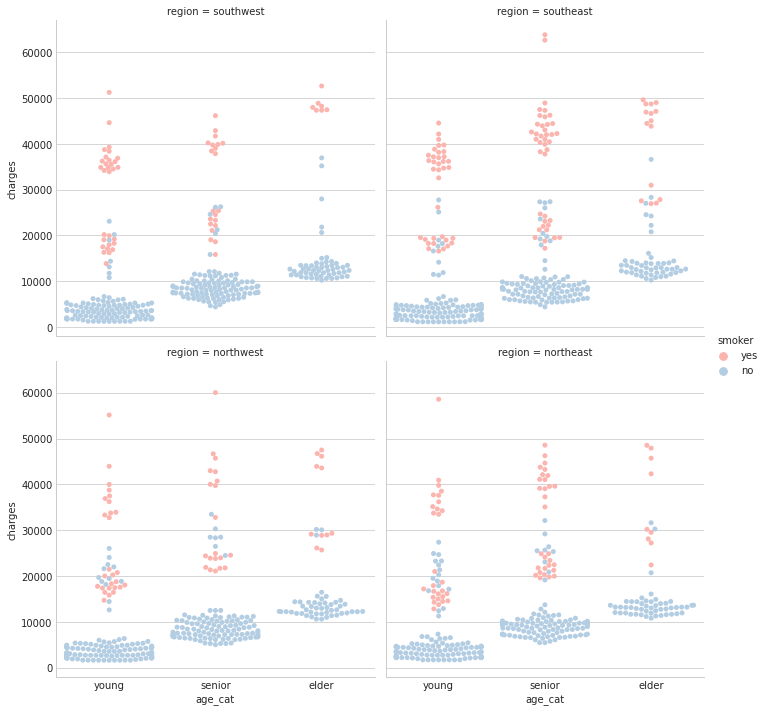

In [87]:
sns.catplot(data=df_3, kind="swarm", x="age_cat", y="charges",col='region',hue='smoker', palette='Pastel1',col_wrap=2)

In [88]:
df_3.groupby(['bmi_weight','region'])['charges'].agg(['mean'])

mean
bmi_weight region                 
normal     northeast  11151.782012
           northwest  10032.506793
           southeast  13286.808262
           southwest   7246.518417
obese      northeast  16652.519575
           northwest  14157.177000
           southeast  16101.383077
           southwest  14637.807937
over       northeast  10690.522690
           northwest  11537.137046
           southeast  10903.671130
           southwest  10870.727068
under      northeast   8914.423920
           northwest   9223.351214
           southwest   7778.771333

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'southwest'),
  Text(1, 0, 'southeast'),
  Text(2, 0, 'northwest'),
  Text(3, 0, 'northeast')])

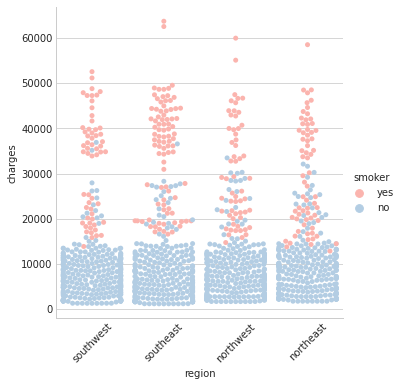

In [89]:
sns.catplot(data=df_3, kind="swarm", x="region", y="charges",hue='smoker', palette='Pastel1')
plt.xticks(rotation=45)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'southwest'),
  Text(1, 0, 'southeast'),
  Text(2, 0, 'northwest'),
  Text(3, 0, 'northeast')])

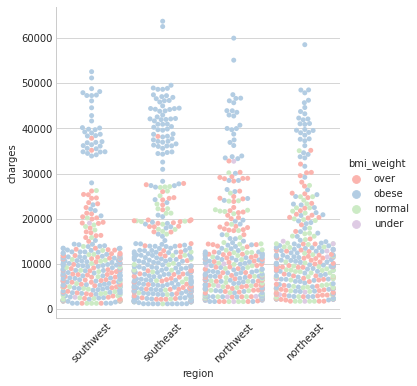

In [90]:
sns.catplot(data=df_3, kind="swarm", x="region", y="charges",hue='bmi_weight', palette='Pastel1')
plt.xticks(rotation=45)

## manual cluster point of view

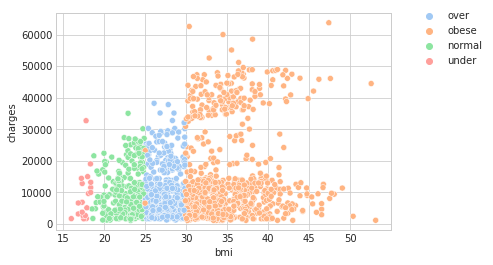

In [91]:
sns.scatterplot(x='bmi',y='charges',hue='bmi_weight',data=df_3,palette='pastel')

#sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df_3,palette='pastel')


plt.legend(bbox_to_anchor=(1.3, 1.05))

- upper orange can be smoker

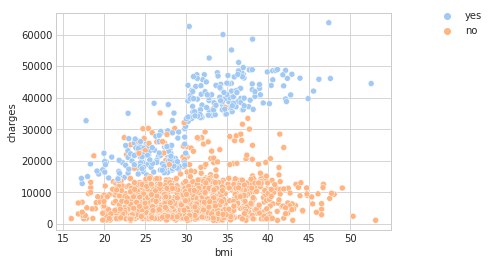

In [92]:
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df_3,palette='pastel')

plt.legend(bbox_to_anchor=(1.3, 1.05))

In [93]:
bri=sns.color_palette('bright')[:10]

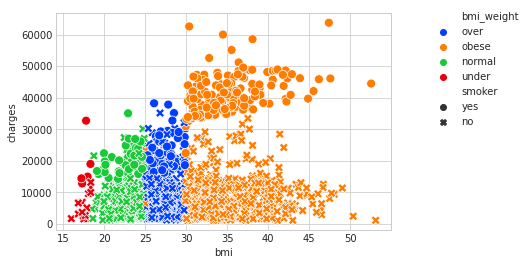

In [94]:
sns.scatterplot(x='bmi',y='charges',hue='bmi_weight',style='smoker',data=df_3,palette='bright',s=80)

plt.legend(bbox_to_anchor=(1.1, 1.05))

In [95]:
#f, ax = plt.subplots(1)
#sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df_3,palette='bright',alpha=0.2, markers='+', ax=ax)
#sns.scatterplot(x='bmi',y='charges',hue='bmi_weight',data=df_3,palette='bright', alpha=0.2,ax=ax)
#plt.legend(bbox_to_anchor=(1.3, 1.05))

## agg cluster

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


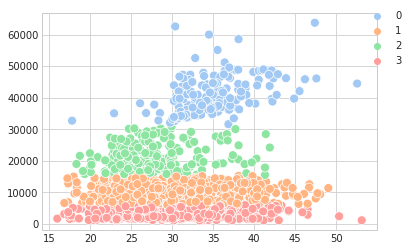

In [96]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

X=df_3[['bmi','charges']]

ac=AgglomerativeClustering(n_clusters=4).fit(X)

sns.scatterplot(X.values[:,0],X.values[:,1],hue=ac.labels_,palette='pastel',s=80)

plt.legend(bbox_to_anchor=(1.1, 1.05))

In [97]:
df_3_sample=df_3.sample(frac=0.05)

X_sample=df_3_sample[['bmi','charges']]

ac_sample=AgglomerativeClustering(n_clusters=4).fit(X_sample)

ac_sample.children_.shape

linked=linkage(ac_sample.children_,'single')

#print(X_sample)

#print(ac_sample.children_)

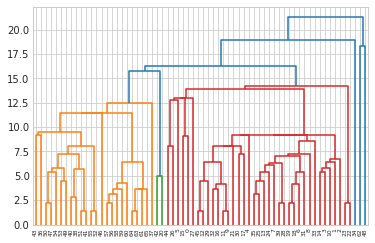

In [98]:
dd=dendrogram(linked,distance_sort='descending')

# stress level?

<AxesSubplot:>

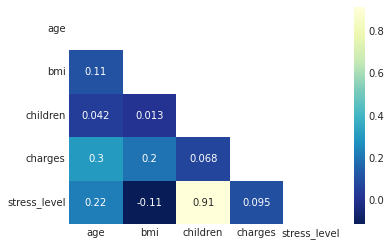

In [99]:
df_3['stress_level']=df_3['children']*df_3['age']/df_3['bmi']


mask = np.zeros_like(df_3.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_3.corr(),mask=mask,cmap='YlGnBu_r',annot=True)


In [100]:
df_3.charges.mean()

13270.422265141257

In [101]:
def charge_func(charge):
    if charge>df_3['charges'].mean():
        return 'above_avg'
    else:
        return 'below_avg'

df_3['charge_status']=df_3['charges'].map(charge_func)

df_3.head()

age     sex     bmi  children smoker     region      charges age_cat  \
0   19  female  27.900         0    yes  southwest  16884.92400   young   
1   18    male  33.770         1     no  southeast   1725.55230   young   
2   28    male  33.000         3     no  southeast   4449.46200   young   
3   33    male  22.705         0     no  northwest  21984.47061   young   
4   32    male  28.880         0     no  northwest   3866.85520   young   

  bmi_weight  stress_level charge_status  
0       over      0.000000     above_avg  
1      obese      0.533017     below_avg  
2      obese      2.545455     below_avg  
3     normal      0.000000     above_avg  
4       over      0.000000     below_avg

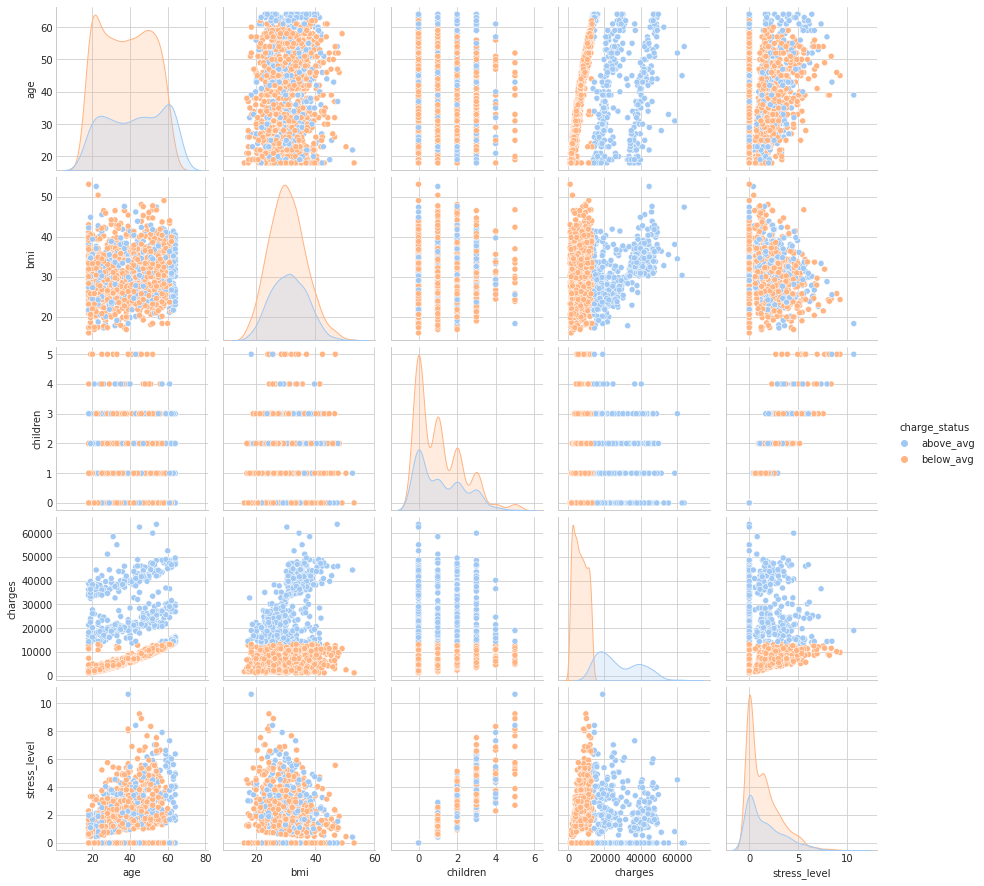

In [102]:
sns.pairplot(df_3,hue='charge_status',palette='pastel')

## model training

In [103]:
df_3.head()

age     sex     bmi  children smoker     region      charges age_cat  \
0   19  female  27.900         0    yes  southwest  16884.92400   young   
1   18    male  33.770         1     no  southeast   1725.55230   young   
2   28    male  33.000         3     no  southeast   4449.46200   young   
3   33    male  22.705         0     no  northwest  21984.47061   young   
4   32    male  28.880         0     no  northwest   3866.85520   young   

  bmi_weight  stress_level charge_status  
0       over      0.000000     above_avg  
1      obese      0.533017     below_avg  
2      obese      2.545455     below_avg  
3     normal      0.000000     above_avg  
4       over      0.000000     below_avg

In [104]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   age_cat        1338 non-null   object 
 8   bmi_weight     1338 non-null   object 
 9   stress_level   1338 non-null   float64
 10  charge_status  1338 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 115.1+ KB


## minmax scaler is better than stardard scaler

## target should not be scaled

## log(target) + mm scaler r2=[98.9%] vs target + mm scaler r2=[91.4%]

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df_3_=df_3.copy()

df_3_['children']=df_3_['children'].astype('object')
#df_3_['charges']=np.log10(df_3_['charges'])
f_num=df_3_.drop(['charges'],axis=1).select_dtypes(exclude='object')
f_cat=df_3_.drop(['charges'],axis=1).select_dtypes(include='object')

#f_num=df_3_.select_dtypes(exclude='object')
#f_cat=df_3_.select_dtypes(include='object')

le=LabelEncoder()
ss=StandardScaler()
mm=MinMaxScaler()

for f in f_cat.columns:   
    le.fit(df_3_[f])
    df_3_[f]=le.transform(df_3_[f])

for f in f_num.columns:
    #ss.fit(df_3_[f].values.reshape(-1,1))
    #df_3_[f]=ss.transform(df_3_[f].values.reshape(-1,1))
    
    mm.fit(df_3_[f].values.reshape(-1,1))
    df_3_[f]=mm.transform(df_3_[f].values.reshape(-1,1))
    
df_3_.head()

age  sex       bmi  children  smoker  region      charges  age_cat  \
0  0.021739    0  0.321227         0       1       3  16884.92400        2   
1  0.000000    1  0.479150         1       0       2   1725.55230        2   
2  0.217391    1  0.458434         3       0       2   4449.46200        2   
3  0.326087    1  0.181464         0       0       1  21984.47061        2   
4  0.304348    1  0.347592         0       0       1   3866.85520        2   

   bmi_weight  stress_level  charge_status  
0           2      0.000000              0  
1           1      0.050022              1  
2           1      0.238881              1  
3           0      0.000000              0  
4           2      0.000000              1

In [106]:
#df_3_.head()

In [107]:
#shuffle before splitting

df_3_.drop(['charge_status'],axis=1,inplace=True)
df_3__=df_3_.sample(frac=1,random_state=1)

X=df_3__.drop('charges',axis=1)
y=df_3__['charges']
y_norm=np.log(df_3__['charges'])

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(X,y_norm,test_size=0.2)

In [108]:
charge_unnorm=sm.OLS(y_train,x_train).fit()
charge_unnorm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              913.7
Date:                Sun, 23 Jan 2022   Prob (F-statistic):                        0.00
Time:                        22:05:07   Log-Likelihood:                         -10846.
No. Observations:                1070   AIC:                                  2.171e+04
Df Residuals:                    1061   BIC:                                  2.175e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age           1.109e+04    848.966     13.068      0.000    9428.619    1.28e+04
sex            140.9346    375.433      0.375      0.707    -595.742     877.611
bmi           1.206e+04   1251.421      9.638      0.000    9605.898    1.45e+04
children       925.2820    443.562      2.086      0.037      54.924    1795.640
smoker        2.417e+04    469.689     51.455      0.000    2.32e+04    2.51e+04
region        -482.0728    171.806     -2.806      0.005    -819.192    -144.954
age_cat       -537.3382    284.810     -1.887      0.059   -1096.193      21.516
bmi_weight    -534.5868    266.327     -2.007      0.045   -1057.173     -12.000
stress_level -4299.2738   3425.307     -1.255      0.210    -1.1e+04    2421.872
==============================================================================
Omnibus:                      256.877   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.705
Skew:                           1.251   Prob(JB):                    5.58e-144
Kurtosis:                       5.921   Cond. No.                         53.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

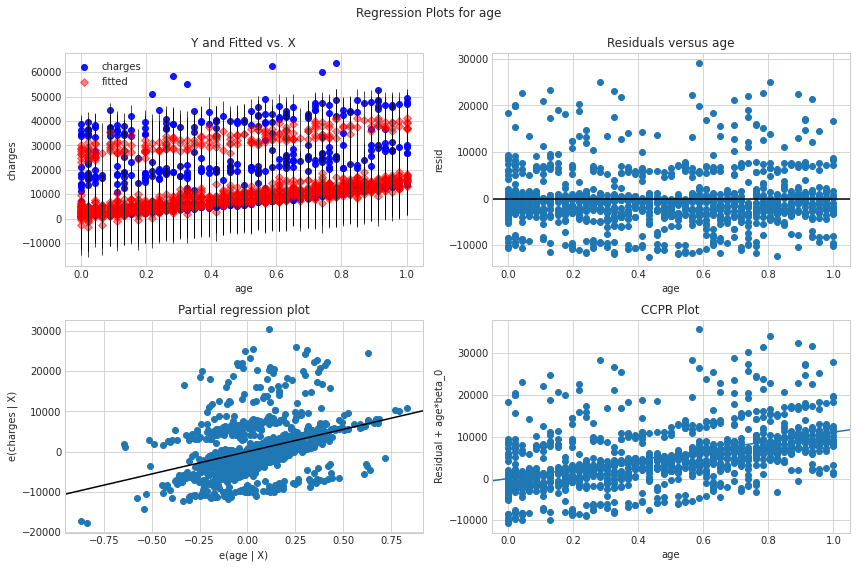

In [109]:
f=plt.figure(figsize=(12,8))
f=sm.graphics.plot_regress_exog(charge_unnorm,'age',fig=f)

In [110]:
charge_norm=sm.OLS(y_train_norm,x_train_norm).fit()
charge_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          1.063e+04
Date:                Sun, 23 Jan 2022   Prob (F-statistic):                        0.00
Time:                        22:05:10   Log-Likelihood:                         -1475.3
No. Observations:                1070   AIC:                                      2969.
Df Residuals:                    1061   BIC:                                      3013.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age              8.6301      0.132     65.199      0.000       8.370       8.890
sex              0.1210      0.059      2.048      0.041       0.005       0.237
bmi              1.4918      0.195      7.641      0.000       1.109       1.875
children         0.1027      0.073      1.411      0.158      -0.040       0.246
smoker           1.6373      0.072     22.842      0.000       1.497       1.778
region           0.0496      0.027      1.836      0.067      -0.003       0.103
age_cat          2.8977      0.044     65.423      0.000       2.811       2.985
bmi_weight       0.2556      0.041      6.169      0.000       0.174       0.337
stress_level    -0.4934      0.546     -0.904      0.366      -1.564       0.578
==============================================================================
Omnibus:                        8.021   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.033
Skew:                           0.066   Prob(JB):                       0.0490
Kurtosis:                       2.656   Cond. No.                         53.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

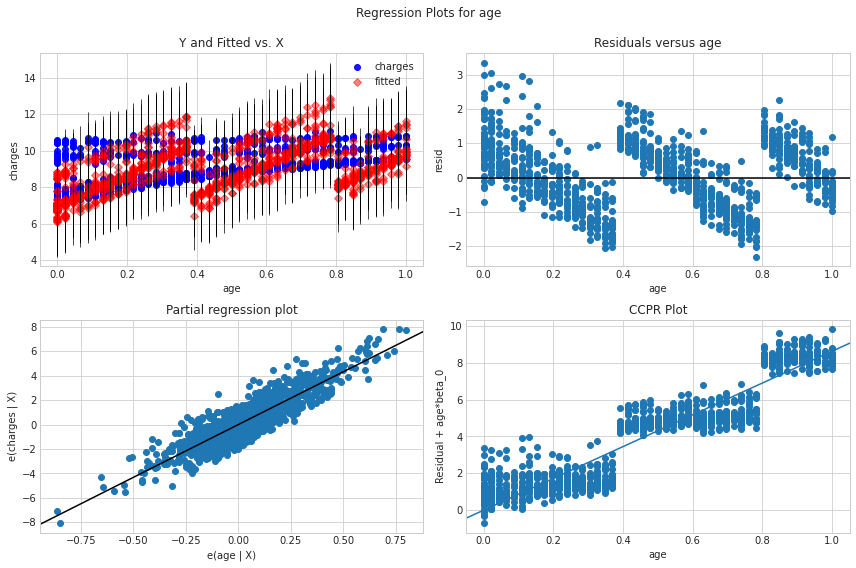

In [111]:
f=plt.figure(figsize=(12,8))
f=sm.graphics.plot_regress_exog(charge_norm,'age',fig=f)

In [112]:
#feature without smoker
wo_smoking=ols('charges~age+bmi',data=df_3__.sample(frac=0.8)).fit()
wo_smoking.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     70.08
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           2.53e-29
Time:                        22:05:13   Log-Likelihood:                -11523.
No. Observations:                1070   AIC:                         2.305e+04
Df Residuals:                    1067   BIC:                         2.307e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3055.5148   1018.550      3.000      0.003    1056.926    5054.103
age          1.09e+04   1173.252      9.291      0.000    8597.994    1.32e+04
bmi         1.335e+04   2152.136      6.203      0.000    9127.294    1.76e+04
==============================================================================
Omnibus:                      255.970   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.545
Skew:                           1.501   Prob(JB):                    8.09e-102
Kurtosis:                       4.197   Cond. No.                         7.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

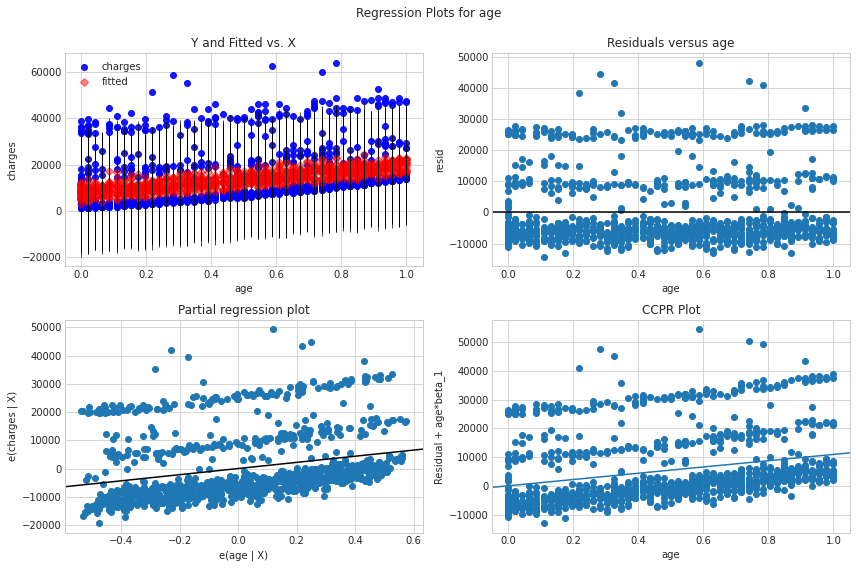

In [113]:
f=plt.figure(figsize=(12,8))
f=sm.graphics.plot_regress_exog(wo_smoking,'age',fig=f)

In [114]:
#feature with smoker
w_smoking=ols('charges~age+bmi+smoker',data=df_3__.sample(frac=0.8)).fit()
w_smoking.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1043.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):          1.77e-316
Time:                        22:05:15   Log-Likelihood:                -10858.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1066   BIC:                         2.174e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1963.7330    557.223     -3.524      0.000   -3057.112    -870.354
age         1.208e+04    625.209     19.327      0.000    1.09e+04    1.33e+04
bmi          1.23e+04   1172.963     10.487      0.000    9998.909    1.46e+04
smoker      2.402e+04    468.999     51.206      0.000    2.31e+04    2.49e+04
==============================================================================
Omnibus:                      242.168   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              572.608
Skew:                           1.215   Prob(JB):                    4.57e-125
Kurtosis:                       5.633   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

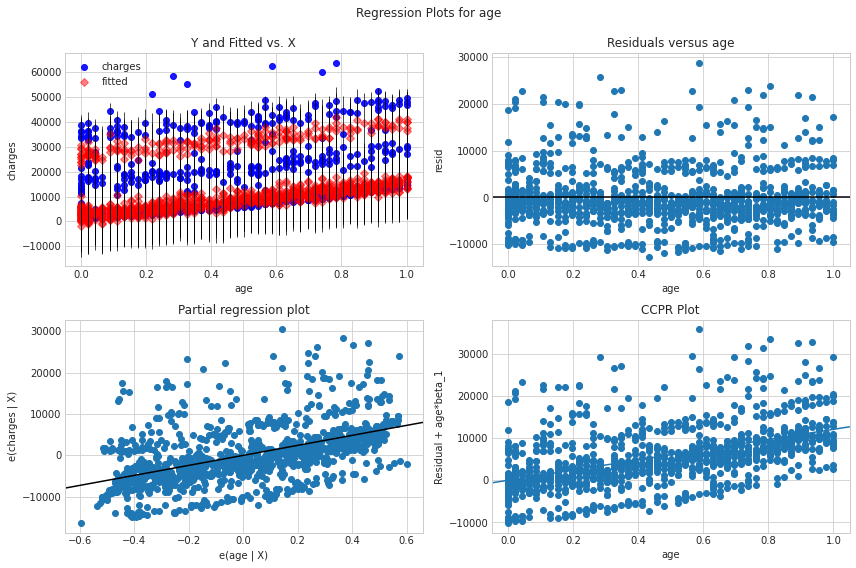

In [115]:
f=plt.figure(figsize=(12,8))
f=sm.graphics.plot_regress_exog(w_smoking,'age',fig=f)

In [116]:
#feature with smoker

df_3__['log_charges']=np.log(df_3__['charges'])
w_smoking_logcharge=ols('log_charges~age+bmi+smoker',data=df_3__.sample(frac=0.8)).fit()
w_smoking_logcharge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1023.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):          3.47e-313
Time:                        22:05:18   Log-Likelihood:                -697.43
No. Observations:                1070   AIC:                             1403.
Df Residuals:                    1066   BIC:                             1423.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8639      0.042    186.851      0.000       7.781       7.947
age            1.6393      0.047     34.544      0.000       1.546       1.732
bmi            0.4225      0.088      4.822      0.000       0.251       0.594
smoker         1.5690      0.035     44.213      0.000       1.499       1.639
==============================================================================
Omnibus:                      283.995   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              821.710
Skew:                           1.332   Prob(JB):                    3.70e-179
Kurtosis:                       6.367   Cond. No.                         7.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

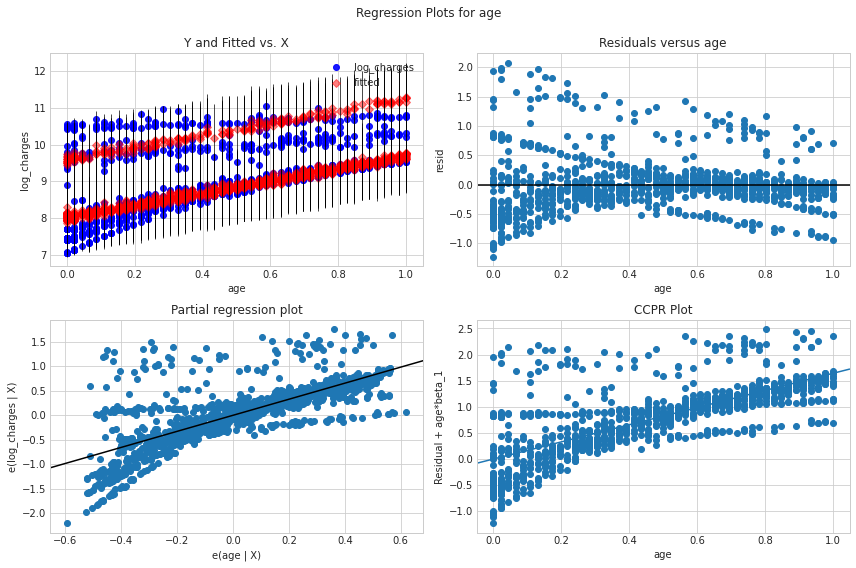

In [117]:
f=plt.figure(figsize=(12,8))
f=sm.graphics.plot_regress_exog(w_smoking_logcharge,'age',fig=f)

## check skewness <- wierd

skewness=$\frac{\bar{x}-z}{\sigma}$

$\bar{x}$ - sample mean

$z$ - mode

$\sigma$ - std

In [118]:
from statistics import mode
def skew(x):
    
    return (x.mean()-mode(x))/x.std()

skew(df_3__['charges']),skew(np.log(df_3__['charges']))
#skew(np.log10(df_3__['charges']))


(0.9604333916635127, 1.844941408121508)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'log10 of charges')

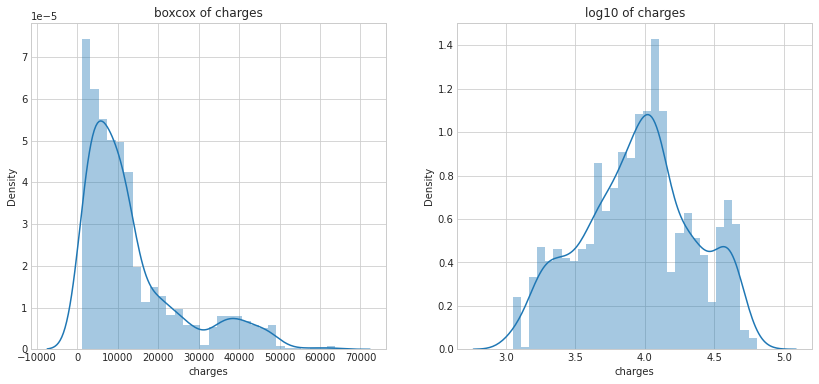

In [119]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(df_3__.charges,bins=30)
plt.title('boxcox of charges')
plt.subplot(122)
sns.distplot(np.log10(df_3__.charges),bins=30)
plt.title('log10 of charges')

In [120]:
lr_norm=LinearRegression()

#x_train_norm,x_test_norm,y_train_norm,y_test_norm

lr_norm.fit(x_train_norm,y_train_norm)
train_norm_pred=lr_norm.predict(x_train_norm)
test_norm_pred=lr_norm.predict(x_test_norm)

print('target-norm r2 training, test:',r2_score(y_train_norm,train_norm_pred),r2_score(y_test_norm,test_norm_pred))

lr_unnorm=LinearRegression()

#x_train_norm,x_test_norm,y_train_norm,y_test_norm

lr_unnorm.fit(x_train,y_train)
train_unnorm_pred=lr_unnorm.predict(x_train)
test_unnorm_pred=lr_unnorm.predict(x_test)
print('target-unnorm r2 training, test:',r2_score(y_train,train_unnorm_pred),r2_score(y_test,test_unnorm_pred))

target-norm r2 training, test: 0.7792203323266735 0.739629844034557
target-unnorm r2 training, test: 0.7499997942632965 0.7564379935280683


In [121]:
rf.fit(x_train_norm,y_train_norm)
rf_train_pred=rf.predict(x_train_norm)
rf_test_pred=rf.predict(x_test_norm)

print('target norm mse of training: %.3f, mse of test: %.3f' % (mean_squared_error(y_train_norm,rf_train_pred),mean_squared_error(y_test_norm,rf_test_pred)))
print('target norm r2 of training:  %.3f, r2 of test: %.3f' % (r2_score(y_train_norm,rf_train_pred),r2_score(y_test_norm,rf_test_pred)))

rf.fit(x_train,y_train)
rf_train_pred_unnorm=rf.predict(x_train)
rf_test_pred_unnorm=rf.predict(x_test)

print('target unnorm mse of training: %.3f, mse of test: %.3f' % (mean_squared_error(y_train,rf_train_pred_unnorm),mean_squared_error(y_test,rf_test_pred_unnorm)))
print('target unnorm r2 of training:  %.3f, r2 of test: %.3f' % (r2_score(y_train,rf_train_pred_unnorm),r2_score(y_test,rf_test_pred_unnorm)))

target norm mse of training: 0.021, mse of test: 0.201
target norm r2 of training:  0.975, r2 of test: 0.772
target unnorm mse of training: 3737539.522, mse of test: 16889246.867
target unnorm r2 of training:  0.975, r2 of test: 0.875


# 87.5% [minmax scaler + unnorm target + rf]

r2 for test results so far. random_state=1, no cv:

- 0.7795: lr analytical/sklearn, no scaler, one-hot cat

- 0.7338: lazy lr, no scaler for num, ordinal cat

- 0.8377: **quad lr**, degree=2, no scaler for num, ordinal cat

- 0.833: lazy rf, no scaler for num, ordinal cat

- 0.7979: lr, feature engineered, minmax scaler, ordinal cat, target unnormalized

- 0.853: lr, feature engineered, minmax scaler, ordinal cat, target normalized

- 0.875: rf, feature engineered, minmax scaler, ordinal cat, target unnormalized

- 0.834: rf, feature engineered, minmax scaler, ordinal cat, target normalized

# Approach 4 - feature importance + poly

https://www.kaggle.com/mariapushkareva/medical-insurance-cost-with-linear-regression

## EDA

In [122]:
df_4=df.copy()

df_4.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<AxesSubplot:xlabel='charges', ylabel='region'>

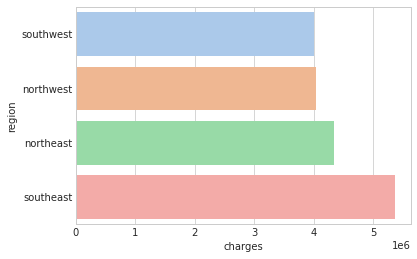

In [123]:
charge_region=df_4.groupby(['region'])['charges'].sum().sort_values(ascending=True)

#charge_region.index

sns.barplot(x=charge_region,y=charge_region.index,palette='pastel')

<AxesSubplot:xlabel='region', ylabel='charges'>

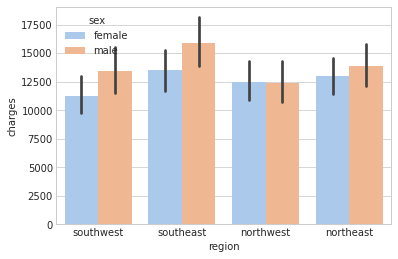

In [124]:
sns.barplot(x='region',y='charges',hue='sex',data=df_4,palette='pastel')

<AxesSubplot:xlabel='region', ylabel='charges'>

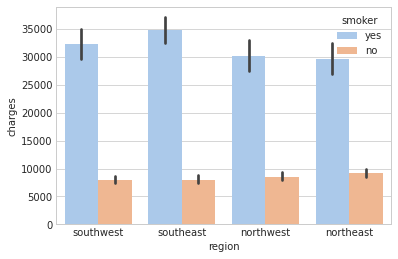

In [125]:
sns.barplot(x='region',y='charges',hue='smoker',data=df_4,palette='pastel')

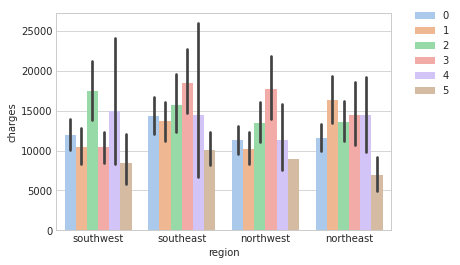

In [126]:
sns.barplot(x='region',y='charges',hue='children',data=df_4,palette='pastel')

plt.legend(bbox_to_anchor=(1.2, 1.05))

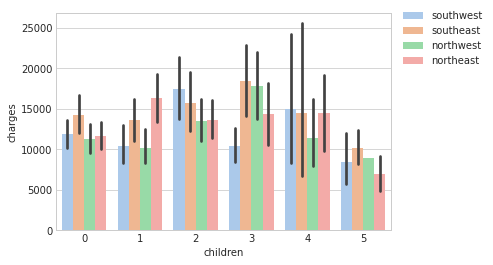

In [127]:
sns.barplot(x='children',y='charges',hue='region',data=df_4,palette='pastel')

plt.legend(bbox_to_anchor=(1.3, 1.05))

- southeast charges more

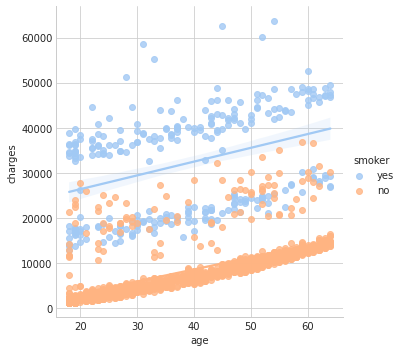

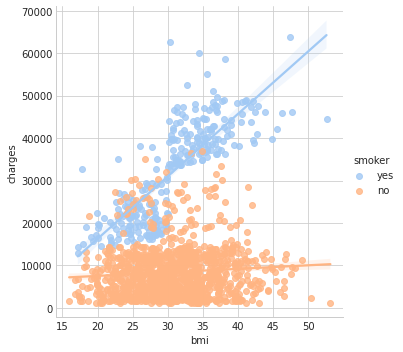

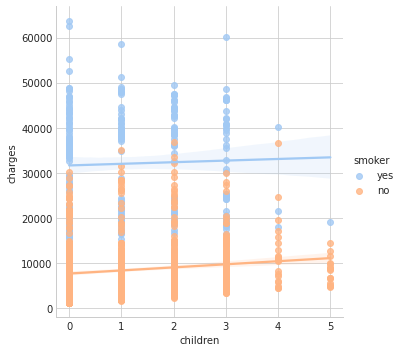

In [128]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df_4, hue='smoker', palette='pastel')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df_4, hue='smoker', palette='pastel')
ax = sns.lmplot(x = 'children', y = 'charges', data=df_4, hue='smoker', palette='pastel')

- ppl have children smoke less

<AxesSubplot:xlabel='children', ylabel='charges'>

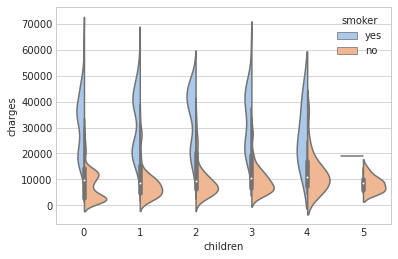

In [129]:
sns.violinplot(x='children',y='charges',hue='smoker',data=df_4,palette='pastel',split=True)

## model trainin

In [130]:
df_4[['sex','smoker','region']]=df_4[['sex', 'smoker', 'region']].astype('category')

#df_4.dtypes

#df_4.sex.dtypes=='category'

le=LabelEncoder()

for f in df_4.columns[df_4.dtypes=='category']:
    le.fit(df_4[f])
    df_4[f]=le.transform(df_4[f])
    
df_4.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

<AxesSubplot:>

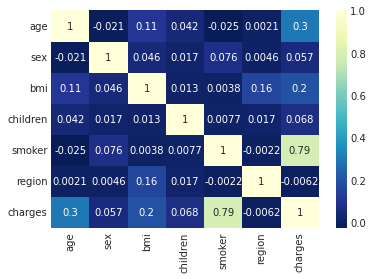

In [131]:
sns.heatmap(df_4.corr(),annot=True,cmap='YlGnBu_r')

In [132]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X=df_4.drop(['charges'],axis=1)
y=df_4['charges']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=1)


lr=LinearRegression()
lr.fit(x_train,y_train)
print('lr score:',lr.score(x_test,y_test))

rdg=Ridge(alpha=0.5)
rdg.fit(x_train,y_train)
print('ridge score:',rdg.score(x_test,y_test))

lss=Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

lss.fit(x_train,y_train)
print('lasso score:',lss.score(x_test,y_test))

rf=RandomForestRegressor(n_estimators = 100, criterion = 'mse',random_state = 1,n_jobs = -1)
rf.fit(x_train,y_train)
train_pred=rf.predict(x_train)
test_pred=rf.predict(x_test)

print('rf r2:',r2_score(y_test,test_pred))

lrp=LinearRegression()
lrp.fit(x_train_poly,y_train_poly)
train_pred_poly=lrp.predict(x_train_poly)
test_pred_poly=lrp.predict(x_test_poly)

print('poly2 lr r2:',r2_score(y_test_poly,test_pred_poly))

lr score: 0.7623224022563388
ridge score: 0.7622715860473155
lasso score: 0.7623216275077203
rf r2: 0.8546549349232768
poly2 lr r2: 0.8614503718920499


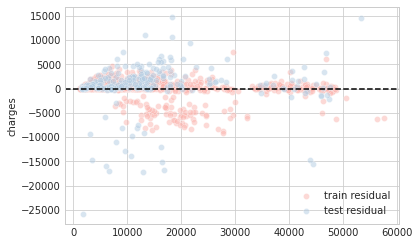

In [133]:
sns.scatterplot(x=train_pred,y=train_pred-y_train,c=pas[0],label='train residual',alpha=0.5)
sns.scatterplot(x=test_pred,y=test_pred-y_test,c=pas[1],label='test residual',alpha=0.5)
plt.axhline(0,c='black',linestyle='--')

<AxesSubplot:xlabel='importance', ylabel='col'>

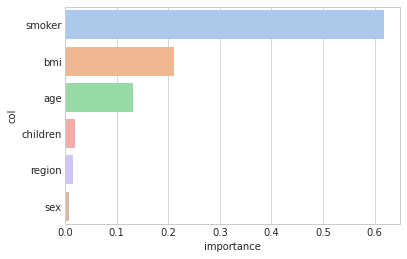

In [134]:
feature_order=pd.DataFrame({'importance': rf.feature_importances_, 
                            'col': X.columns})

feature_order.sort_values(by=['importance'],ascending=False,inplace=True)

sns.barplot(x='importance', y='col',palette='pastel',data=feature_order)

# Approach 5 - multiple regressors

https://www.kaggle.com/sohommajumder21/medical-cost-8-models-90-accuracy

In [135]:
df_5=df.copy()

df_5.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

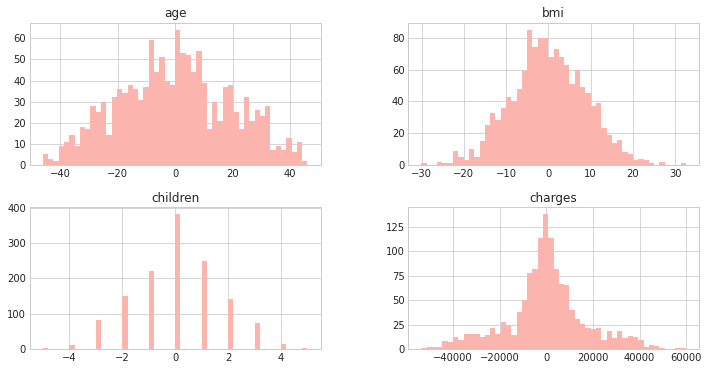

In [136]:
#up down diff
df_5[['age','bmi','children','charges']].diff().hist(color=pas[0],figsize=(12,6),bins=50)

#left right diff
#df_5[['age','bmi','children','charges']].diff(axis=1) 

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='charges'>

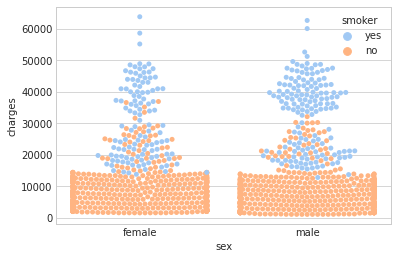

In [137]:
sns.swarmplot(x='sex',y='charges',hue='smoker',data=df_5,palette='pastel')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='region', ylabel='charges'>

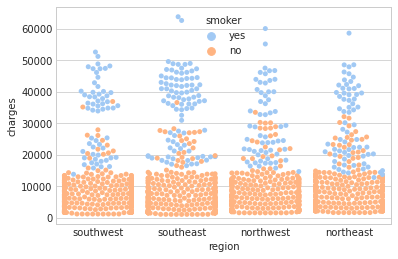

In [138]:
sns.swarmplot(x='region',y='charges',hue='smoker',data=df_5,palette='pastel')

## encoding

In [139]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [140]:
for column in df_5:
    print(df_5[column].name)

age
sex
bmi
children
smoker
region
charges


In [141]:
for f in df_5.columns:
    print(df_5[f].dtypes)

int64
object
float64
int64
object
object
float64


In [142]:
ss=StandardScaler()
le=LabelEncoder()

for f in df_5.columns:
    if df_5[f].dtypes!='object':
        #num encoding
        ss.fit(df_5[f].values.reshape(-1,1))
        df_5[f]=ss.transform(df_5[f].values.reshape(-1,1))
    else:
        #cat encoding
        le.fit(df_5[f])
        df_5[f]=le.transform(df_5[f])

df_5.head()


age  sex       bmi  children  smoker  region   charges
0 -1.438764    0 -0.453320 -0.908614       1       3  0.298584
1 -1.509965    1  0.509621 -0.078767       0       2 -0.953689
2 -0.797954    1  0.383307  1.580926       0       2 -0.728675
3 -0.441948    1 -1.305531 -0.908614       0       1  0.719843
4 -0.513149    1 -0.292556 -0.908614       0       1 -0.776802

In [143]:
X=df_5.drop(['charges'],axis=1)
y=df_5['charges']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=4)
dt = DecisionTreeRegressor(max_depth = 5)
rf = RandomForestRegressor(max_depth = 5, n_estimators=100)
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)
cb = CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)

regressors = [('Linear Regression', lr), 
              ('K Nearest Neighbours', knn),
              ('Decision Tree', dt), 
              ('Random Forest', rf), 
              ('AdaBoost', ada),
              ('Gradient Boosting Regressor', gbr), 
              ('XGBoost', xgb), 
              ('catboost', cb)]

In [145]:
res = pd.DataFrame(regressors, columns =['reg_name', 'model'])
res

reg_name  \
0            Linear Regression   
1         K Nearest Neighbours   
2                Decision Tree   
3                Random Forest   
4                     AdaBoost   
5  Gradient Boosting Regressor   
6                      XGBoost   
7                     catboost   

                                               model  
0                                 LinearRegression()  
1                 KNeighborsRegressor(n_neighbors=4)  
2                 DecisionTreeRegressor(max_depth=5)  
3                 RandomForestRegressor(max_depth=5)  
4              AdaBoostRegressor(learning_rate=0.01)  
5  GradientBoostingRegressor(learning_rate=0.2, m...  
6  XGBRegressor(base_score=None, booster=None, co...  
7  <catboost.core.CatBoostRegressor object at 0x7...

In [146]:
acc=[]
for reg_name, reg in regressors:
    
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    accr=round(r2_score(y_test,y_pred),5)*100
    
    print('{:s}:{:.2f} %'.format(reg_name,accr))
    
    acc.append(accr)

res['acc']=acc
res

Linear Regression:76.23 %
K Nearest Neighbours:74.46 %
Decision Tree:86.27 %
Random Forest:87.68 %
AdaBoost:86.52 %
Gradient Boosting Regressor:87.91 %
XGBoost:87.81 %
catboost:87.95 %


reg_name  \
0            Linear Regression   
1         K Nearest Neighbours   
2                Decision Tree   
3                Random Forest   
4                     AdaBoost   
5  Gradient Boosting Regressor   
6                      XGBoost   
7                     catboost   

                                               model     acc  
0                                 LinearRegression()  76.232  
1                 KNeighborsRegressor(n_neighbors=4)  74.464  
2                 DecisionTreeRegressor(max_depth=5)  86.268  
3  (DecisionTreeRegressor(max_depth=5, max_featur...  87.679  
4  (DecisionTreeRegressor(max_depth=3, random_sta...  86.518  
5  ([DecisionTreeRegressor(criterion='friedman_ms...  87.910  
6  XGBRegressor(base_score=0.5, booster='gbtree',...  87.813  
7  <catboost.core.CatBoostRegressor object at 0x7...  87.947

In [147]:
#df=pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')

#df.head()

# mine

In [148]:
df_my=df.copy()
df_my.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [149]:
df_my['children']=df_my['children'].astype('object')

num_col=(df_my.columns[df_my.dtypes!='object'])[:-1].to_list()
cat_col=df_my.columns[df_my.dtypes=='object'].to_list()
target_col=[(df_my.columns[df_my.dtypes!='object'])[-1]]

target_col,num_col,cat_col

(['charges'], ['age', 'bmi'], ['sex', 'children', 'smoker', 'region'])

In [150]:
df_myoh=df_my.copy()

mm=MinMaxScaler()

#target encoding - normalize
df_myoh[target_col]=np.log(df_myoh[target_col])

#num encoding
for f in num_col+target_col:
    mm.fit(df_myoh[f].values.reshape(-1,1))
    df_myoh[f]=mm.transform(df_myoh[f].values.reshape(-1,1))
    
#cat encoding
df_myoh=pd.get_dummies(data=df_myoh, prefix='oh',columns=cat_col,drop_first=True,dtype='int8')

df_myoh.head()    

age       bmi   charges  oh_male  oh_1  oh_2  oh_3  oh_4  oh_5  \
0  0.021739  0.321227  0.671096        0     0     0     0     0     0   
1  0.000000  0.479150  0.106563        1     1     0     0     0     0   
2  0.217391  0.458434  0.341011        1     0     0     1     0     0   
3  0.326087  0.181464  0.736417        1     0     0     0     0     0   
4  0.304348  0.347592  0.306275        1     0     0     0     0     0   

   oh_yes  oh_northwest  oh_southeast  oh_southwest  
0       1             0             0             1  
1       0             0             1             0  
2       0             0             1             0  
3       0             1             0             0  
4       0             1             0             0

In [151]:
df_myord=df_my.copy()

le=LabelEncoder()

#target encoding - normalize
df_myord[target_col]=np.log(df_myord[target_col])

for f in cat_col:
    le.fit(df_myord[f])
    df_myord[f]=le.transform(df_myord[f])
    
for f in num_col+target_col:
    mm.fit(df_myord[f].values.reshape(-1,1))
    df_myord[f]=mm.transform(df_myord[f].values.reshape(-1,1))
    
df_myord.head()
    

age  sex       bmi  children  smoker  region   charges
0  0.021739    0  0.321227         0       1       3  0.671096
1  0.000000    1  0.479150         1       0       2  0.106563
2  0.217391    1  0.458434         3       0       2  0.341011
3  0.326087    1  0.181464         0       0       1  0.736417
4  0.304348    1  0.347592         0       0       1  0.306275

In [152]:
df_myoh2=df_myoh.copy()

pf2=PolynomialFeatures(degree=2)

X_quad=pf2.fit_transform(df_myoh2[['age','bmi']])

#X_quad.shape,df_myoh2[['age','bmi']].shape

for i in range(X_quad.shape[1]):
    df_myoh2['f_'+str(i)]=X_quad[:,i]
    
#df_myoh2.head()

df_myoh2.drop(['age','bmi'],axis=1,inplace=True)

df_myoh2.head()

charges  oh_male  oh_1  oh_2  oh_3  oh_4  oh_5  oh_yes  oh_northwest  \
0  0.671096        0     0     0     0     0     0       1             0   
1  0.106563        1     1     0     0     0     0       0             0   
2  0.341011        1     0     0     1     0     0       0             0   
3  0.736417        1     0     0     0     0     0       0             1   
4  0.306275        1     0     0     0     0     0       0             1   

   oh_southeast  oh_southwest  f_0       f_1       f_2       f_3       f_4  \
0             0             1  1.0  0.021739  0.321227  0.000473  0.006983   
1             1             0  1.0  0.000000  0.479150  0.000000  0.000000   
2             1             0  1.0  0.217391  0.458434  0.047259  0.099660   
3             0             0  1.0  0.326087  0.181464  0.106333  0.059173   
4             0             0  1.0  0.304348  0.347592  0.092628  0.105789   

        f_5  
0  0.103187  
1  0.229585  
2  0.210162  
3  0.032929  
4  0.120820

In [153]:
df_myord2=df_myord.copy()

pf2=PolynomialFeatures(degree=2)

X_quad=pf2.fit_transform(df_myord2[['age','bmi']])

#X_quad.shape,df_myoh2[['age','bmi']].shape

for i in range(X_quad.shape[1]):
    df_myord2['f_'+str(i)]=X_quad[:,i]
    
#df_myoh2.head()

df_myord2.drop(['age','bmi'],axis=1,inplace=True)

df_myord2.head()

sex  children  smoker  region   charges  f_0       f_1       f_2       f_3  \
0    0         0       1       3  0.671096  1.0  0.021739  0.321227  0.000473   
1    1         1       0       2  0.106563  1.0  0.000000  0.479150  0.000000   
2    1         3       0       2  0.341011  1.0  0.217391  0.458434  0.047259   
3    1         0       0       1  0.736417  1.0  0.326087  0.181464  0.106333   
4    1         0       0       1  0.306275  1.0  0.304348  0.347592  0.092628   

        f_4       f_5  
0  0.006983  0.103187  
1  0.000000  0.229585  
2  0.099660  0.210162  
3  0.059173  0.032929  
4  0.105789  0.120820

In [154]:
df_3_.head()

age  sex       bmi  children  smoker  region      charges  age_cat  \
0  0.021739    0  0.321227         0       1       3  16884.92400        2   
1  0.000000    1  0.479150         1       0       2   1725.55230        2   
2  0.217391    1  0.458434         3       0       2   4449.46200        2   
3  0.326087    1  0.181464         0       0       1  21984.47061        2   
4  0.304348    1  0.347592         0       0       1   3866.85520        2   

   bmi_weight  stress_level  
0           2      0.000000  
1           1      0.050022  
2           1      0.238881  
3           0      0.000000  
4           2      0.000000

In [155]:
df_myord_f2all=df_myord.copy()

X_quad=pf2.fit_transform(df_myord_f2all.drop(['charges'],axis=1))

#X_quad.shape,df_myoh2[['age','bmi']].shape

for i in range(X_quad.shape[1]):
    df_myord_f2all['f_'+str(i)]=X_quad[:,i]
    
#df_myoh2.head()

df_myord_f2all.drop(['age','sex','bmi','children','smoker','region'],axis=1,inplace=True)

df_myord_f2all.head()

charges  f_0       f_1  f_2       f_3  f_4  f_5  f_6       f_7       f_8  \
0  0.671096  1.0  0.021739  0.0  0.321227  0.0  1.0  3.0  0.000473  0.000000   
1  0.106563  1.0  0.000000  1.0  0.479150  1.0  0.0  2.0  0.000000  0.000000   
2  0.341011  1.0  0.217391  1.0  0.458434  3.0  0.0  2.0  0.047259  0.217391   
3  0.736417  1.0  0.326087  1.0  0.181464  0.0  0.0  1.0  0.106333  0.326087   
4  0.306275  1.0  0.304348  1.0  0.347592  0.0  0.0  1.0  0.092628  0.304348   

   ...      f_18      f_19      f_20      f_21  f_22  f_23  f_24  f_25  f_26  \
0  ...  0.103187  0.000000  0.321227  0.963680   0.0   0.0   0.0   1.0   3.0   
1  ...  0.229585  0.479150  0.000000  0.958300   1.0   0.0   2.0   0.0   0.0   
2  ...  0.210162  1.375303  0.000000  0.916868   9.0   0.0   6.0   0.0   0.0   
3  ...  0.032929  0.000000  0.000000  0.181464   0.0   0.0   0.0   0.0   0.0   
4  ...  0.120820  0.000000  0.000000  0.347592   0.0   0.0   0.0   0.0   0.0   

   f_27  
0   9.0  
1   4.0  
2   4.0  
3   1.0  
4   1.0  

[5 rows x 29 columns]

In [156]:
df_3_f2all_=df_3_.copy()

X_quad=pf2.fit_transform(df_3_f2all_.drop(['charges'],axis=1))

X_quad.shape

df_3_f2all=pd.DataFrame(X_quad,columns=['f_'+str(i) for i in range(X_quad.shape[1])])
df_3_f2all['charges']=df_3_['charges']

df_3_f2all.head()

df_3_f2all_scl=df_3_f2all.copy()
df_3_f2all_scl['charges']=df_myord_f2all['charges']

df_3_f2all_scl

f_0       f_1  f_2       f_3  f_4  f_5  f_6  f_7  f_8       f_9  ...  \
0     1.0  0.021739  0.0  0.321227  0.0  1.0  3.0  2.0  2.0  0.000000  ...   
1     1.0  0.000000  1.0  0.479150  1.0  0.0  2.0  2.0  1.0  0.050022  ...   
2     1.0  0.217391  1.0  0.458434  3.0  0.0  2.0  2.0  1.0  0.238881  ...   
3     1.0  0.326087  1.0  0.181464  0.0  0.0  1.0  2.0  0.0  0.000000  ...   
4     1.0  0.304348  1.0  0.347592  0.0  0.0  1.0  2.0  2.0  0.000000  ...   
...   ...       ...  ...       ...  ...  ...  ...  ...  ...       ...  ...   
1333  1.0  0.695652  1.0  0.403820  3.0  0.0  1.0  1.0  1.0  0.454534  ...   
1334  1.0  0.000000  0.0  0.429379  0.0  0.0  0.0  2.0  1.0  0.000000  ...   
1335  1.0  0.000000  0.0  0.562012  0.0  0.0  2.0  2.0  1.0  0.000000  ...   
1336  1.0  0.065217  0.0  0.264730  0.0  0.0  3.0  2.0  2.0  0.000000  ...   
1337  1.0  0.934783  0.0  0.352704  0.0  1.0  1.0  0.0  2.0  0.000000  ...   

      f_46  f_47      f_48  f_49  f_50      f_51  f_52      f_53      f_54  \
0      6.0   6.0  0.000000   4.0   4.0  0.000000   4.0  0.000000  0.000000   
1      4.0   2.0  0.100043   4.0   2.0  0.100043   1.0  0.050022  0.002502   
2      4.0   2.0  0.477762   4.0   2.0  0.477762   1.0  0.238881  0.057064   
3      2.0   0.0  0.000000   4.0   0.0  0.000000   0.0  0.000000  0.000000   
4      2.0   2.0  0.000000   4.0   4.0  0.000000   4.0  0.000000  0.000000   
...    ...   ...       ...   ...   ...       ...   ...       ...       ...   
1333   1.0   1.0  0.454534   1.0   1.0  0.454534   1.0  0.454534  0.206601   
1334   0.0   0.0  0.000000   4.0   2.0  0.000000   1.0  0.000000  0.000000   
1335   4.0   2.0  0.000000   4.0   2.0  0.000000   1.0  0.000000  0.000000   
1336   6.0   6.0  0.000000   4.0   4.0  0.000000   4.0  0.000000  0.000000   
1337   0.0   2.0  0.000000   0.0   0.0  0.000000   4.0  0.000000  0.000000   

       charges  
0     0.671096  
1     0.106563  
2     0.341011  
3     0.736417  
4     0.306275  
...        ...  
1333  0.555877  
1334  0.167357  
1335  0.092438  
1336  0.144077  
1337  0.806170  

[1338 rows x 56 columns]

In [157]:
from sklearn.model_selection import cross_val_score
#df_myord,df_myoh,df_myord2,df_myoh2

X=df_2.drop(['charges','region'],axis=1)
y=df_2.charges

quad=PolynomialFeatures(degree=2)

X_quad=quad.fit_transform(X)

data=[df_myord,df_myord_f2all,df_myoh,df_myord2,df_myoh2,df_3_,df_3_f2all,df_3_f2all_scl,df_3_.drop(['stress_level'],axis=1)]
name=['df_myord','df_myord_f2all','df_myoh','df_myord2','df_myoh2','df_3_','df_3_f2all','df_3_f2all_scl','df_3_drop_stresslevel']

scores=[]
lr=LinearRegression()

for i,d in enumerate(data):
    
    X=d.drop(['charges'],axis=1)
    y=d['charges']
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
       
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    #cv=cross_val_score(lr, X, y, cv=5)
    
    r2_train=r2_score(y_train,pred_train)
    r2_test=r2_score(y_test,pred_test)
    
    scores.append(('lr_'+name[i],r2_train,r2_test))#,cv.mean()))
    

In [158]:
scores

[('lr_df_myord', 0.7623689340535311, 0.783801737215549),
 ('lr_df_myord_f2all', 0.8363944614474745, 0.8621395974564192),
 ('lr_df_myoh', 0.7652811223960713, 0.7879895351780286),
 ('lr_df_myord2', 0.7648632797304131, 0.7888702755166936),
 ('lr_df_myoh2', 0.7673711550697262, 0.7920164300236279),
 ('lr_df_3_', 0.7485903570359673, 0.7633280225660694),
 ('lr_df_3_f2all', 0.8507184167319563, 0.8657578741806635),
 ('lr_df_3_f2all_scl', 0.8404527386000877, 0.8668948938442743),
 ('lr_df_3_drop_stresslevel', 0.7484030959909317, 0.7624185834530476)]

In [159]:
#res=pd.DataFrame(scores, columns =['reg_name', 'r2_train','r2_test','cv_score'])

#res=res.set_index('reg_name')

#res

In [160]:
#sns.lineplot(data=res, x="reg_name", y="passengers", hue="month")

#sns.scatterplot(data=res,s=200)

#plt.xticks(rotation=45)

## feature engineer revisit

In [161]:
c_temp=df_myord.columns

In [162]:
df_myoh.columns

#test_list.append(test_list.pop(test_list.index(5)))

Index(['age', 'bmi', 'charges', 'oh_male', 'oh_1', 'oh_2', 'oh_3', 'oh_4',
       'oh_5', 'oh_yes', 'oh_northwest', 'oh_southeast', 'oh_southwest'],
      dtype='object')

In [163]:
#generate df for poly feature in an accumulated way
def poly_df(df,deg=2):

    df_out=[]
    pf=PolynomialFeatures(degree=deg)
    
    for i,c in enumerate(df.columns,start=1):
        X_quad=pf.fit_transform(df.iloc[:,:i])
        df_temp=pd.DataFrame(X_quad,columns=['f_'+str(i) for i in range(X_quad.shape[1])])
        df_temp['charges']=df_myord_f2all['charges']

        df_out.append(df_temp)
        
    return df_out

#df_check_polyfactor

dfs_myord=poly_df(df_myord.drop(['charges'],axis=1))

dfs_myoh=poly_df(df_myoh.drop(['charges'],axis=1))

df_goodfeature=df_3_.reindex(sorted(df_3_.columns),axis=1)

#df_goodfeature=df_goodfeature.drop(['charge_status'],axis=1)

dfs_gf=poly_df(df_goodfeature.drop(['charges'],axis=1))

dfs_gf[3]

#print(len(dfs_myord),len(dfs_myoh),len(dfs_gf))
#print(len(df_myord.columns),len(df_myoh.columns),len(df_goodfeature.columns))

f_0       f_1  f_2       f_3  f_4       f_5       f_6       f_7  \
0     1.0  0.021739  2.0  0.321227  2.0  0.000473  0.043478  0.006983   
1     1.0  0.000000  2.0  0.479150  1.0  0.000000  0.000000  0.000000   
2     1.0  0.217391  2.0  0.458434  1.0  0.047259  0.434783  0.099660   
3     1.0  0.326087  2.0  0.181464  0.0  0.106333  0.652174  0.059173   
4     1.0  0.304348  2.0  0.347592  2.0  0.092628  0.608696  0.105789   
...   ...       ...  ...       ...  ...       ...       ...       ...   
1333  1.0  0.695652  1.0  0.403820  1.0  0.483932  0.695652  0.280918   
1334  1.0  0.000000  2.0  0.429379  1.0  0.000000  0.000000  0.000000   
1335  1.0  0.000000  2.0  0.562012  1.0  0.000000  0.000000  0.000000   
1336  1.0  0.065217  2.0  0.264730  2.0  0.004253  0.130435  0.017265   
1337  1.0  0.934783  0.0  0.352704  2.0  0.873819  0.000000  0.329701   

           f_8  f_9      f_10  f_11      f_12      f_13  f_14   charges  
0     0.043478  4.0  0.642454   4.0  0.103187  0.642454   4.0  0.671096  
1     0.000000  4.0  0.958300   2.0  0.229585  0.479150   1.0  0.106563  
2     0.217391  4.0  0.916868   2.0  0.210162  0.458434   1.0  0.341011  
3     0.000000  4.0  0.362927   0.0  0.032929  0.000000   0.0  0.736417  
4     0.608696  4.0  0.695184   4.0  0.120820  0.695184   4.0  0.306275  
...        ...  ...       ...   ...       ...       ...   ...       ...  
1333  0.695652  1.0  0.403820   1.0  0.163071  0.403820   1.0  0.555877  
1334  0.000000  4.0  0.858757   2.0  0.184366  0.429379   1.0  0.167357  
1335  0.000000  4.0  1.124025   2.0  0.315858  0.562012   1.0  0.092438  
1336  0.130435  4.0  0.529459   4.0  0.070082  0.529459   4.0  0.144077  
1337  1.869565  0.0  0.000000   0.0  0.124400  0.705408   4.0  0.806170  

[1338 rows x 16 columns]

In [164]:
def score_gen(df,reg,reg_name):
    
    scores=[] 

    for i,d in enumerate(df):

        X=d.drop(['charges'],axis=1)
        y=d['charges']
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

        reg.fit(x_train,y_train)
        pred_test=reg.predict(x_test)
        pred_train=reg.predict(x_train)

        #cv=cross_val_score(lr, X, y, cv=5)

        r2_train=r2_score(y_train,pred_train)
        r2_test=r2_score(y_test,pred_test)

        scores.append((reg_name+'_f2_num_'+str(len(d.columns)),r2_train,r2_test))#,cv.mean()))

    df_out=pd.DataFrame(scores, columns =['reg_name', 'r2_train','r2_test'])#,'cv_score'])
    df_out=df_out.set_index('reg_name')
    
    return df_out

In [165]:
dfs_myoh[11]

f_0       f_1       f_2  f_3  f_4  f_5  f_6  f_7  f_8  f_9  ...  f_82  \
0     1.0  0.021739  0.321227  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   0.0   
1     1.0  0.000000  0.479150  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2     1.0  0.217391  0.458434  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0   
3     1.0  0.326087  0.181464  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4     1.0  0.304348  0.347592  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
...   ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
1333  1.0  0.695652  0.403820  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0   
1334  1.0  0.000000  0.429379  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1335  1.0  0.000000  0.562012  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1336  1.0  0.065217  0.264730  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1337  1.0  0.934783  0.352704  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   1.0   

      f_83  f_84  f_85  f_86  f_87  f_88  f_89  f_90   charges  
0      0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0  0.671096  
1      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  0.106563  
2      0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  0.341011  
3      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  0.736417  
4      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  0.306275  
...    ...   ...   ...   ...   ...   ...   ...   ...       ...  
1333   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  0.555877  
1334   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.167357  
1335   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  0.092438  
1336   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  0.144077  
1337   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  0.806170  

[1338 rows x 92 columns]

In [166]:
res_myoh=score_gen(dfs_myoh,LinearRegression(),'lr')
res_myord=score_gen(dfs_myord,LinearRegression(),'lr')

#res_all=score_gen(dfs_myoh+dfs_myord,LinearRegression())

In [167]:
df_myord.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'res_myord')

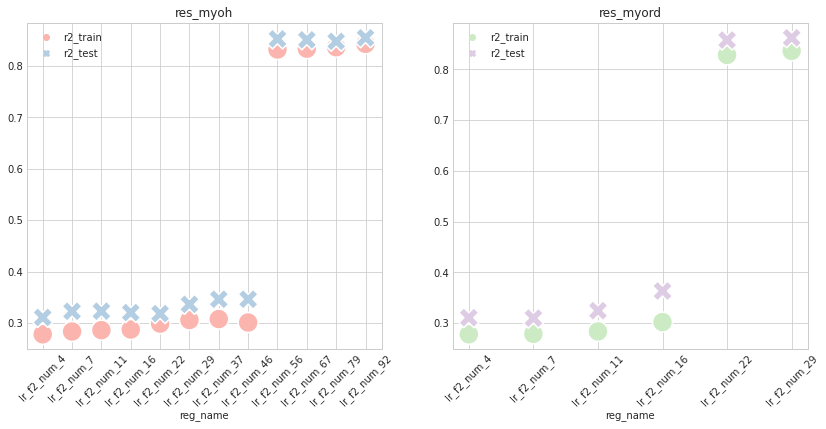

In [168]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.scatterplot(data=res_myoh,s=400,palette=pas[:2])
plt.xticks(rotation=45)
plt.title('res_myoh')
plt.subplot(122)
sns.scatterplot(data=res_myord,s=400,palette=pas[2:4])
plt.xticks(rotation=45)
plt.title('res_myord')

In [169]:
res_myoh

r2_train   r2_test
reg_name                        
lr_f2_num_4   0.278171  0.310910
lr_f2_num_7   0.283603  0.322919
lr_f2_num_11  0.286182  0.323134
lr_f2_num_16  0.287501  0.320415
lr_f2_num_22  0.298991  0.318416
lr_f2_num_29  0.305979  0.336440
lr_f2_num_37  0.307776  0.346305
lr_f2_num_46  0.301113  0.346331
lr_f2_num_56  0.832092  0.852702
lr_f2_num_67  0.833745  0.850924
lr_f2_num_79  0.836497  0.847997
lr_f2_num_92  0.843106  0.854883

In [170]:
res_myord

r2_train   r2_test
reg_name                        
lr_f2_num_4   0.278171  0.310910
lr_f2_num_7   0.278995  0.309958
lr_f2_num_11  0.283874  0.324678
lr_f2_num_16  0.302211  0.363396
lr_f2_num_22  0.828345  0.857665
lr_f2_num_29  0.836394  0.862140

In [171]:
df_goodfeature.columns

Index(['age', 'age_cat', 'bmi', 'bmi_weight', 'charges', 'children', 'region',
       'sex', 'smoker', 'stress_level'],
      dtype='object')

Text(0.5, 1.0, 'res_goodfeature')

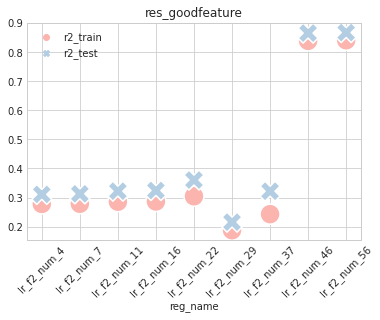

In [172]:
res_gf=score_gen(dfs_gf,LinearRegression(),'lr')

sns.scatterplot(data=res_gf,s=400,palette=pas[:2])
plt.xticks(rotation=45)
plt.title('res_goodfeature')

In [173]:
res_gf

r2_train   r2_test
reg_name                        
lr_f2_num_4   0.278171  0.310910
lr_f2_num_7   0.278747  0.312775
lr_f2_num_11  0.285764  0.322028
lr_f2_num_16  0.286575  0.324339
lr_f2_num_22  0.304472  0.360259
lr_f2_num_29  0.187824  0.215646
lr_f2_num_37  0.243065  0.321901
lr_f2_num_46  0.838342  0.865053
lr_f2_num_56  0.840453  0.866895

In [174]:
df_goodfeature.columns

Index(['age', 'age_cat', 'bmi', 'bmi_weight', 'charges', 'children', 'region',
       'sex', 'smoker', 'stress_level'],
      dtype='object')

In [175]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [176]:
def poly_select(df,deg=2):

    pf=PolynomialFeatures(degree=deg)
    
    X_quad=pf.fit_transform(df)
    
    df_out=pd.DataFrame(X_quad,columns=['f_'+str(i) for i in range(X_quad.shape[1])])
    df_out['charges']=df_myord_f2all['charges']
        
    return df_out

#selected cols
unrel=['age','sex','children','region']
base=['bmi','smoker']

bage=base+['age']
bage_agecat=base+['age_cat']
bage_agecat_weight=bage_agecat+['bmi_weight']
bage_agecat_weight_stress=bage_agecat_weight+['stress_level']
bage_weight=bage+['bmi_weight']
bage_weight_stress=bage_weight+['stress_level']
bage_stress=bage+['stress_level']

bsex=base+['sex']
bchi=base+['children']
breg=base+['region']
all_=unrel+base
allagecat=all_+['age_cat']
allweight=all_+['bmi_weight']
allstress=all_+['stress_level']
all_all=all_+['age_cat','bmi_weight','stress_level']

#polyfeature
df_sel=[unrel,base,bage,bsex,bchi,breg,bage_agecat,bage_agecat_weight,bage_agecat_weight_stress,bage_weight,bage_weight_stress, bage_stress,all_,allagecat,allweight,allstress,all_all]
df_row=['unrel','base','bage','bsex','bchi','breg','bage_agecat','bage_agecat_weight','bage_agecat_weight_stress','bage_weight','bage_weight_stress', 'bage_stress','all_','allagecat','allweight','allstress','all_all']

In [177]:
len(df_sel),len(df_row)

(17, 17)

Text(0.5, 1.0, 'res_goodfeature linear regression polyfeature')

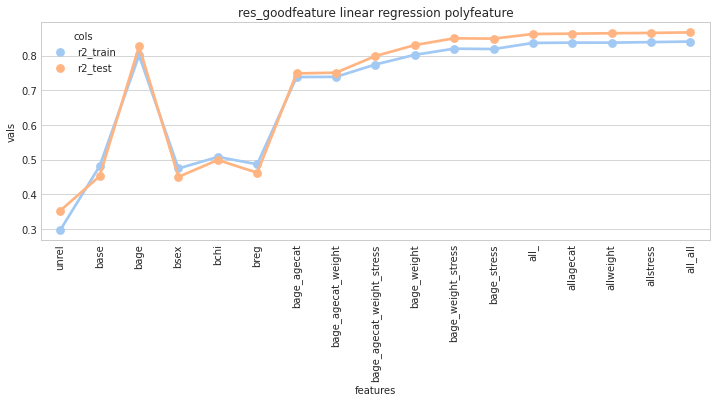

In [178]:
#a=poly_select(df_goodfeature[unrel])

#pd.DataFrame(a[0])
dfs=[]
for ds in df_sel:
    
    dfs.append(poly_select(df_goodfeature[ds]))
 

res_sel=score_gen(dfs,LinearRegression(),'lr')
res_sel['features']=df_row
#res_sel.set_index('reg_name')

res_m = res_sel.melt('features', var_name='cols', value_name='vals')

plt.figure(figsize=(12,4))
#sns.set(font_scale = 1)
#plt.rcParams['font.size'] =20
sns.pointplot(x="features", y="vals", hue='cols', data=res_m,s=200,palette='pastel')
#sns.catplot(x="features", y="vals", hue='cols', data=res_m, s=200,kind='point')
plt.xticks(rotation=90)
plt.title('res_goodfeature linear regression polyfeature')




In [179]:
res_sel

r2_train   r2_test                   features
reg_name                                                   
lr_f2_num_16  0.297437  0.353248                      unrel
lr_f2_num_7   0.481682  0.452686                       base
lr_f2_num_11  0.800650  0.826431                       bage
lr_f2_num_11  0.474766  0.450718                       bsex
lr_f2_num_11  0.507981  0.499292                       bchi
lr_f2_num_11  0.487052  0.462562                       breg
lr_f2_num_11  0.738186  0.748632                bage_agecat
lr_f2_num_16  0.738747  0.750749         bage_agecat_weight
lr_f2_num_22  0.774325  0.798714  bage_agecat_weight_stress
lr_f2_num_16  0.802139  0.830267                bage_weight
lr_f2_num_22  0.819936  0.849824         bage_weight_stress
lr_f2_num_16  0.818831  0.848826                bage_stress
lr_f2_num_29  0.836394  0.862140                       all_
lr_f2_num_37  0.837376  0.863184                  allagecat
lr_f2_num_37  0.837277  0.864406                  allweight
lr_f2_num_37  0.838831  0.865288                  allstress
lr_f2_num_56  0.840453  0.866895                    all_all

Text(0.5, 1.0, 'res_goodfeature randomforest polyfeature')

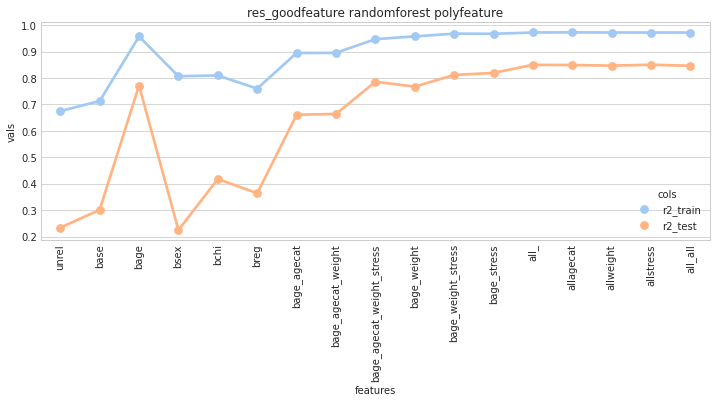

In [180]:
rf=RandomForestRegressor(n_estimators = 100,criterion = 'mse',random_state = 1,n_jobs = -1)

res_sel_rf=score_gen(dfs,rf,'rf')
res_sel_rf['features']=df_row
#res_sel.set_index('reg_name')

res_m_rf = res_sel_rf.melt('features', var_name='cols', value_name='vals')

plt.figure(figsize=(12,4))
#sns.set(font_scale = 1)
#plt.rcParams['font.size'] =20
sns.pointplot(x="features", y="vals", hue='cols', data=res_m_rf,s=200,palette='pastel')
#sns.catplot(x="features", y="vals", hue='cols', data=res_m, s=200,kind='point')
plt.xticks(rotation=90)
plt.title('res_goodfeature randomforest polyfeature')

In [181]:
res_sel_rf

r2_train   r2_test                   features
reg_name                                                   
rf_f2_num_16  0.674970  0.233614                      unrel
rf_f2_num_7   0.713039  0.301616                       base
rf_f2_num_11  0.957259  0.771659                       bage
rf_f2_num_11  0.806844  0.224964                       bsex
rf_f2_num_11  0.809760  0.417907                       bchi
rf_f2_num_11  0.760092  0.364106                       breg
rf_f2_num_11  0.894742  0.661211                bage_agecat
rf_f2_num_16  0.895360  0.664020         bage_agecat_weight
rf_f2_num_22  0.947139  0.785936  bage_agecat_weight_stress
rf_f2_num_16  0.957550  0.767567                bage_weight
rf_f2_num_22  0.967973  0.811623         bage_weight_stress
rf_f2_num_16  0.967337  0.819442                bage_stress
rf_f2_num_29  0.972332  0.849882                       all_
rf_f2_num_37  0.972808  0.849163                  allagecat
rf_f2_num_37  0.972294  0.846965                  allweight
rf_f2_num_37  0.972131  0.850241                  allstress
rf_f2_num_56  0.972153  0.846531                    all_all

# check feature combination! find out impact!

# more trying!

- encode num_f minmax, encode cat_f onehot 

- rf + polynomial feature

- app3 feature engineer importance check

- outlier detection

https://www.kaggle.com/rpsuraj/outlier-detection-techniques-simplified